# Problem Statement

ElecKart is an e-commerce firm based out of Ontario, Canada specialising in electronic products. Over the last one year, they had spent a significant amount of money on marketing. Occasionally, they had also offered big-ticket promotions (similar to the Big Billion Day). They are about to create a marketing budget for the next year, which includes spending on commercials, online campaigns, and pricing & promotion strategies. The CFO feels that the money spent over the last 12 months on marketing was not sufficiently impactful, and, that they can either cut on the budget or reallocate it optimally across marketing levers to improve the revenue response.

 

Imagine that you are a part of the marketing team working on budget optimisation. You need to develop a market mix model to observe the actual impact of different marketing variables over the last year. Using your understanding of the model, you have to recommend the optimal budget allocation for different marketing levers for the next year.

# Project Pipeline:
1. Data reading and understanding
2. Data Cleaning
3. Feature Engineering and Feature Selection
4. Exploratory Data Analysis
4. Model Building and Evaluation


# 1. Data Reading And Understanding

In [1]:
#supressing the warnings
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Setting display options for the rows and columns
pd.set_option('display.max_row', 200)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:0.3f}'.format)

In [3]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# importing/reading the csv file
path = '/content/gdrive/MyDrive/E Commerce Capstone Project/E-Commerce Capstone Dataset/ConsumerElectronics.csv'

cust_df = pd.read_csv(path)

In [5]:
# Inspecting the first five rows of the dataframe
cust_df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000.000,3419300926147000.000,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.000,1420830839915200.000,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.000,2421912925714800.000,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.000,4416592101738400.000,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.000,4419525153426400.000,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


Inference:
- There are few invalid values \N, we need to treat them

In [6]:
# Understading the general info of the Data Frame
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

Inferences:
- Our dataset has the 20 features and around 1.6M sample examples
- There are no null values in our dataset
- Columns order_date, gmv, deliverybdays, deliverycdays, pincode have incorrect data types and need to be changed.

In [7]:
# Looking at the statistical distubution of the dataset
cust_df.describe(percentiles = [0.25, 0.5, 0.75, 0.90, 0.99])

,Year,Month,order_id,order_item_id,units,sla,product_mrp,product_procurement_sla
count,1648824.000,1648824.000,1648824.000,1648824.000,1648824.000,1648824.000,1648824.000,1648824.000
mean,2015.519,6.586,2842444674146328.500,13756277530325384.000,1.022,5.688,4108.309,5.403
std,0.500,3.623,1269134332596894.250,55945981798631008.000,0.254,2.983,8510.918,53.466
min,2015.000,1.000,76331515.000,108016495.000,1.000,0.000,0.000,-1.000
25%,2015.000,3.000,1602588503969575.000,1606725138262300.000,1.000,4.000,799.000,1.000
50%,2016.000,6.000,2611824528743350.000,2619185472741150.000,1.000,6.000,1599.000,2.000
75%,2016.000,10.000,3610613539366250.000,4397705931628400.000,1.000,7.000,3499.000,3.000
90%,2016.000,11.000,4520541993801910.000,4561094519921880.000,1.000,9.000,7120.000,5.000
99%,2016.000,12.000,4626530348261358.000,300037347714467712.000,2.000,13.000,45990.000,13.000
max,2016.000,12.000,5395076790260600.000,300037347717704000.000,50.000,1006.000,299999.000,1000.000


Inferences:
- The numeric features are nearly normally distributed
- Also, there are outliers for the same, we need to treat them

# 2. Data Cleaning And Preparation

In [8]:
cust_df.columns.values

array(['fsn_id', 'order_date', 'Year', 'Month', 'order_id',
       'order_item_id', 'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla'], dtype=object)

## Fixing the invalid values - '/N' & white/blank spaces

In [9]:
# Treating the Invalid values
cust_df.replace(r'^\s+$', np.nan, regex=True, inplace = True)
cust_df.replace('\\N', np.nan, inplace = True)

## Treating the Null values

In [10]:
# Checking the nulls percentage for each column
100*cust_df.isnull().sum()/cust_df.shape[0]

fsn_id                             0.000
order_date                         0.000
Year                               0.000
Month                              0.000
order_id                           0.000
order_item_id                      0.000
gmv                                0.297
units                              0.000
deliverybdays                     79.631
deliverycdays                     79.631
s1_fact.order_payment_type         0.000
sla                                0.000
cust_id                            0.297
pincode                            0.297
product_analytic_super_category    0.000
product_analytic_category          0.000
product_analytic_sub_category      0.000
product_analytic_vertical          0.353
product_mrp                        0.000
product_procurement_sla            0.000
dtype: float64

Inference:
- The features gmv, cust_id, pincode has the same amount of nulls, lets drop the records of one of the feature nulls and see how it effects the rest

In [11]:
# Dropping the null records of the GMV
cust_df = cust_df.loc[~(cust_df.gmv.isnull())]

In [12]:
# Dropping the columns - deliverybdays & deliverycdays as it has the nulls greater then 70%
cust_df.drop(columns=['deliverybdays', 'deliverycdays'], axis=1, inplace=True)

In [13]:
# Dropping the null records of the product_analytic_vertical
cust_df = cust_df.loc[~(cust_df.product_analytic_vertical.isnull())]

In [14]:
# Checking the nulls percentage of each feature again
100*cust_df.isnull().sum()/cust_df.shape[0]

fsn_id                            0.000
order_date                        0.000
Year                              0.000
Month                             0.000
order_id                          0.000
order_item_id                     0.000
gmv                               0.000
units                             0.000
s1_fact.order_payment_type        0.000
sla                               0.000
cust_id                           0.000
pincode                           0.000
product_analytic_super_category   0.000
product_analytic_category         0.000
product_analytic_sub_category     0.000
product_analytic_vertical         0.000
product_mrp                       0.000
product_procurement_sla           0.000
dtype: float64

As assumed the gmv, pincode and cust I'd has the nulls for the same records. Treating(Dropping) the one fixed the other

## Bringing the features into right datatype

In [15]:
print(cust_df.dtypes)


fsn_id                              object
order_date                          object
Year                                 int64
Month                                int64
order_id                           float64
order_item_id                      float64
gmv                                 object
units                                int64
s1_fact.order_payment_type          object
sla                                  int64
cust_id                             object
pincode                             object
product_analytic_super_category     object
product_analytic_category           object
product_analytic_sub_category       object
product_analytic_vertical           object
product_mrp                          int64
product_procurement_sla              int64
dtype: object


In [16]:
# Correcting the data types
cust_df['order_date'] = pd.to_datetime(cust_df['order_date'])
cust_df['gmv'] = pd.to_numeric(cust_df['gmv'])

cust_df.dtypes

fsn_id                                     object
order_date                         datetime64[ns]
Year                                        int64
Month                                       int64
order_id                                  float64
order_item_id                             float64
gmv                                       float64
units                                       int64
s1_fact.order_payment_type                 object
sla                                         int64
cust_id                                    object
pincode                                    object
product_analytic_super_category            object
product_analytic_category                  object
product_analytic_sub_category              object
product_analytic_vertical                  object
product_mrp                                 int64
product_procurement_sla                     int64
dtype: object

In [17]:
# Seperating numeric and categorical data types

num_cols = cust_df.select_dtypes('number').columns
cat_cols = cust_df.select_dtypes(exclude='number').columns

## Data Cleaning feature by feature

In [18]:
cat_cols.values

array(['fsn_id', 'order_date', 's1_fact.order_payment_type', 'cust_id',
       'pincode', 'product_analytic_super_category',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical'], dtype=object)

In [19]:
cust_df[cat_cols].head(20)

,fsn_id,order_date,s1_fact.order_payment_type,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,COD,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,COD,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,COD,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,Prepaid,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,Prepaid,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod
5,ACCCX3S5JGAJETYR,2015-10-17 12:07:24,Prepaid,-7.64154636189174E+018,-1.91905269756031E+018,CE,CameraAccessory,CameraAccessory,CameraTripod
6,ACCCX3S5JGAJETYR,2015-10-16 14:59:57,Prepaid,-7.15614041481066E+016,6.40491320207757E+018,CE,CameraAccessory,CameraAccessory,CameraTripod
7,ACCCX3S5JGAJETYR,2015-10-15 23:41:39,COD,9.17327596234152E+018,-1.60630305201981E+018,CE,CameraAccessory,CameraAccessory,CameraTripod
9,ACCCX3S5JGAJETYR,2015-10-25 22:52:34,COD,-7.80915606896163E+018,-9.779010321304E+017,CE,CameraAccessory,CameraAccessory,CameraTripod
10,ACCCX3S5JGAJETYR,2015-10-19 09:37:06,COD,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod


## Category Columns

### Payment Type

In [20]:
cust_df.rename({'s1_fact.order_payment_type':'payment_type'}, inplace=True, axis=1)

In [21]:
100*cust_df['payment_type'].value_counts()/cust_df.shape[0]

COD       72.504
Prepaid   27.496
Name: payment_type, dtype: float64

About 72% of the customers are buying the product by COD

### 'product_analytic_super_category', product_analytic_category', 'product_analytic_sub_category'

In [22]:
for col in ['product_analytic_super_category', 'product_analytic_category', 'product_analytic_sub_category', 'product_analytic_vertical']:
  print(col)
  print()
  print(cust_df[col].value_counts()*100/cust_df.shape[0])
  print(50*'*')
  print()

product_analytic_super_category

CE   100.000
Name: product_analytic_super_category, dtype: float64
**************************************************

product_analytic_category

EntertainmentSmall   57.127
CameraAccessory      15.677
GamingHardware       14.061
GameCDDVD             6.973
Camera                6.162
Name: product_analytic_category, dtype: float64
**************************************************

product_analytic_sub_category

Speaker               32.740
CameraAccessory       14.582
GamingAccessory       12.290
TVVideoSmall           8.703
HomeAudio              7.595
Game                   6.967
AudioMP3Player         6.870
Camera                 6.162
GamingConsole          1.771
CameraStorage          1.095
AudioAccessory         0.713
HomeTheatre            0.259
AmplifierReceiver      0.247
GameMembershipCards    0.006
Name: product_analytic_sub_category, dtype: float64
**************************************************

product_analytic_vertical

LaptopSpeaker

In [23]:
# Dropping Product analytic super category, as it has 100% of the values are same, which doesn't add any value to our model
cust_df.drop('product_analytic_super_category', axis=1, inplace=True)

### Filtering the Data of the required sub-categories



The goal of this project is to develop MMM for the three product sub categories - camera accessory, home audio and gaming accessory. So, we will filter the data of these sub-categories alone. Ignoring the rest

In [24]:
# Filtering the data based on the sub-catg
print(cust_df.shape)
cust_df = cust_df.loc[(cust_df.product_analytic_sub_category=='CameraAccessory') |
                       (cust_df.product_analytic_sub_category=='GamingAccessory')|
                       (cust_df.product_analytic_sub_category=='HomeAudio')]

print(cust_df.shape)

(1638106, 17)
(564595, 17)


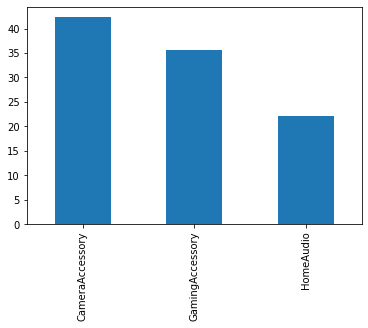

In [25]:
(cust_df['product_analytic_sub_category'].value_counts()*100/cust_df.shape[0]).plot(kind='bar')
plt.show()

*After filtering we have the data of good propotion for each of the sub-categories*

## Numeric Columns

In [26]:
num_cols.values

array(['Year', 'Month', 'order_id', 'order_item_id', 'gmv', 'units',
       'sla', 'product_mrp', 'product_procurement_sla'], dtype=object)

In [27]:
cust_df[num_cols].head()

,Year,Month,order_id,order_item_id,gmv,units,sla,product_mrp,product_procurement_sla
0,2015,10,3419300926147000.000,3419300926147000.000,6400.000,1,5,7190,0
1,2015,10,1420830839915200.000,1420830839915200.000,6900.000,1,7,7190,0
2,2015,10,2421912925714800.000,2421912925714800.000,1990.000,1,10,2099,3
3,2015,10,4416592101738400.000,4416592101738400.000,1690.000,1,4,2099,3
4,2015,10,4419525153426400.000,4419525153426400.000,1618.000,1,6,2099,3


In [28]:
cust_df[num_cols].describe(percentiles=[.25, .5, .75, .80, .9, .95, .99])

,Year,Month,order_id,order_item_id,gmv,units,sla,product_mrp,product_procurement_sla
count,564595.000,564595.000,564595.000,564595.000,564595.000,564595.000,564595.000,564595.000,564595.000
mean,2015.538,6.415,2843904212547276.500,14154945095963146.000,1284.424,1.026,5.893,2468.182,2.549
std,0.499,3.618,1270329487522406.500,56915849897536008.000,2439.809,0.255,2.700,4683.692,1.742
min,2015.000,1.000,146499482.000,188485029.000,0.000,1.000,0.000,0.000,-1.000
25%,2015.000,3.000,1601859143171950.000,1605850932042900.000,299.000,1.000,4.000,700.000,2.000
50%,2016.000,6.000,2612810838307400.000,2620056225888300.000,550.000,1.000,6.000,1199.000,2.000
75%,2016.000,10.000,3610365558144000.000,4398636020065400.000,1499.000,1.000,7.000,2800.000,3.000
80%,2016.000,10.000,4410998026964680.000,4449597302630720.000,1889.000,1.000,8.000,3001.000,4.000
90%,2016.000,11.000,4524939328558560.000,4564801582981420.000,2799.000,1.000,9.000,5399.000,5.000
95%,2016.000,12.000,4580124505815620.000,4623972960659590.000,4060.000,1.000,11.000,6990.000,5.000


Inferences:
- By seeing the statistical distribution, we can see there are few outliers for gmv, mrp, units and others
- We need to handle the zero for the mrp and gmv, as usually companies never offer products for free
- For procurement_sla, we see there are few values(min) which are negative which is not possible, need to handle that as well

### Year & Month

In [29]:
for col in ['Year', 'Month']:
  print(col)
  print(cust_df[col].value_counts())
  print()

Year
2016    303972
2015    260623
Name: Year, dtype: int64

Month
9     74452
10    61630
2     54920
5     54609
3     52567
1     52013
12    50574
4     47271
11    43329
6     42398
7     30735
8        97
Name: Month, dtype: int64



### Units

In [30]:
cust_df['units'].value_counts()

1     553771
2       8960
3       1017
4        374
5        237
6         81
10        80
8         29
7         18
9         11
15         3
12         3
13         2
17         2
18         2
34         1
16         1
19         1
20         1
39         1
Name: units, dtype: int64

### gmv
* Gross Marchandise value - Gross merchandise value (GMV) is the total value of merchandise sold over a given period of time through a customer-to-customer (C2C) exchange site. It is a measure of the growth of the business or use of the site to sell merchandise owned by others.
- GMV is calculated by multiplying the total amount of goods sold by their sales price in a given period. GMV = Sales Price of Goods x Number of Goods Sold.

In [31]:
cust_df['gmv'].value_counts()

299.000      10601
339.000       9758
199.000       7932
2499.000      7520
399.000       7228
             ...  
6164.000         1
698.996          1
5525.000         1
3916.000         1
16566.000        1
Name: gmv, Length: 6460, dtype: int64

In [32]:
cust_df['gmv'].describe()

count   564595.000
mean      1284.424
std       2439.809
min          0.000
25%        299.000
50%        550.000
75%       1499.000
max     148050.000
Name: gmv, dtype: float64

In [33]:
# checking for gmv with zero
cust_df[cust_df['gmv'] == 0].shape

(625, 17)

### Product MRP

In [34]:
cust_df['product_mrp'].describe()

count   564595.000
mean      2468.182
std       4683.692
min          0.000
25%        700.000
50%       1199.000
75%       2800.000
max     180000.000
Name: product_mrp, dtype: float64

In [35]:
# Checking for the zero mrp

cust_df[cust_df['product_mrp'] == 0].shape[0]

3422

In [36]:
cust_df[cust_df['product_mrp'] == 0].head(10)

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,payment_type,sla,cust_id,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
12807,ACCDGXGZQUGHFYHT,2015-10-23 19:26:01,2015,10,1424634732111000.000,1424634732111000.000,3500.000,1,COD,5,1.95757717948634E+018,-4.61973414463541E+018,GamingHardware,GamingAccessory,GamingAccessoryKit,0,-1
15031,ACCDHHZZGFBDPJRP,2015-10-20 21:27:29,2015,10,3422117911872300.000,3422117911872300.000,690.000,1,Prepaid,6,4.4039953528426E+018,1.15136841865603E+018,CameraAccessory,CameraAccessory,CameraBattery,0,-1
15032,ACCDHHZZGFBDPJRP,2015-10-28 23:49:41,2015,10,2429116502765100.000,2429116502765100.000,690.000,1,COD,8,2.02066165332605E+018,-5.73945007094169E+018,CameraAccessory,CameraAccessory,CameraBattery,0,-1
15529,ACCDHTZ4CZCECAFF,2015-10-27 01:05:20,2015,10,1427429193266100.000,1427429193266100.000,1050.000,1,COD,7,2.54451421812842E+018,8.25363017907057E+018,CameraAccessory,CameraAccessory,CameraBattery,0,-1
16980,ACCDK94FSKCZBJCU,2015-10-28 18:36:07,2015,10,4428925467622000.000,4428925467622000.000,1099.000,1,Prepaid,6,7.46177327353558E+018,1.84021085056852E+018,EntertainmentSmall,HomeAudio,Dock,0,-1
16981,ACCDK94FSKCZBJCU,2015-10-28 08:28:19,2015,10,1428563779371800.000,1428563779371800.000,1099.000,1,COD,6,7.68753833881333E+018,1.84021085056852E+018,EntertainmentSmall,HomeAudio,Dock,0,-1
16982,ACCDK94FSKCZBJCU,2015-10-14 00:31:46,2015,10,3416163533968100.000,3416163533968100.000,1099.000,1,COD,6,8.190936899675E+018,-8.95613073453997E+018,EntertainmentSmall,HomeAudio,Dock,0,-1
17333,ACCDM6FF7FTZEHZN,2015-10-31 18:19:57,2015,10,3431501003584000.000,3431501003584000.000,253.000,1,Prepaid,12,9.06987174296518E+018,-7.70816034119555E+018,CameraAccessory,CameraAccessory,CameraBattery,0,-1
17356,ACCDM6FFABMXFBHG,2015-10-06 19:00:46,2015,10,4409931793885500.000,4409931793885500.000,228.000,1,COD,5,-6.98869013901039E+018,-6.71230362034968E+018,CameraAccessory,CameraAccessory,CameraBattery,0,-1
17357,ACCDM6FFABMXFBHG,2015-10-12 08:01:27,2015,10,1414708063071100.000,1414708063071100.000,228.000,1,COD,7,-7.10421140187762E+018,-5.09694409821032E+017,CameraAccessory,CameraAccessory,CameraBattery,0,-1


Upon inspecting the records of the zero mrp, we see multiple features have negative such as pincode, procurement sla and gmv is high. So rather than imputing lets drop these records

In [37]:
# Droppping the records of the zero MRP
cust_df = cust_df[~(cust_df['product_mrp'] == 0)]

In [38]:
# checking for gmv with zero again
cust_df[cust_df['gmv'] == 0].shape[0]

261

In [39]:
cust_df[cust_df['gmv'] == 0].head(10)

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,payment_type,sla,cust_id,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
404764,ACCE9YXYDUNHTRQR,2015-12-07 17:39:49,2015,12,4463453891475600.000,4463453891475600.000,0.000,1,COD,7,-6886876054600800256.000,-4383811865114310144.000,GamingHardware,GamingAccessory,GamingHeadset,999,2
404765,ACCE9YXYDUNHTRQR,2015-12-07 18:00:50,2015,12,3463466793994400.000,3463466793994400.000,0.000,1,COD,8,-6001457880472059904.000,-4276053466011460096.000,GamingHardware,GamingAccessory,GamingHeadset,999,2
404766,ACCE9YXYDUNHTRQR,2015-12-08 17:04:38,2015,12,2464296080642200.000,2464296080642200.000,0.000,1,COD,11,-1720456793288019968.000,-5240890162732789760.000,GamingHardware,GamingAccessory,GamingHeadset,999,2
404767,ACCE9YXYDUNHTRQR,2015-12-10 15:27:29,2015,12,3465961553756400.000,3465961553756400.000,0.000,1,COD,10,7343620912929909760.000,-3650184451177930240.000,GamingHardware,GamingAccessory,GamingHeadset,999,2
404768,ACCE9YXYDUNHTRQR,2015-12-10 18:33:33,2015,12,1466076722327800.000,1466076722327800.000,0.000,1,COD,9,6820083566898249728.000,6595725059686500352.000,GamingHardware,GamingAccessory,GamingHeadset,999,2
404769,ACCE9YXYDUNHTRQR,2015-12-11 12:09:11,2015,12,4466657908424800.000,4466657908424800.000,0.000,1,COD,9,3637976453553560064.000,-1671387701301890048.000,GamingHardware,GamingAccessory,GamingHeadset,999,2
404770,ACCE9YXYDUNHTRQR,2015-12-11 21:26:32,2015,12,2467043663677000.000,2467043663677000.000,0.000,1,COD,11,8143487674652359680.000,3342325511265430016.000,GamingHardware,GamingAccessory,GamingHeadset,999,2
404771,ACCE9YXYDUNHTRQR,2015-12-11 23:29:37,2015,12,1467120155270000.000,1467120155270000.000,0.000,1,COD,8,7527308782336889856.000,6280636945680329728.000,GamingHardware,GamingAccessory,GamingHeadset,999,2
404772,ACCE9YXYDUNHTRQR,2015-12-12 14:25:38,2015,12,3467657663391100.000,3467657663391100.000,0.000,1,COD,9,-7471603872290220032.000,8865679890303200256.000,GamingHardware,GamingAccessory,GamingHeadset,999,2
404773,ACCE9YXYDUNHTRQR,2015-12-13 11:10:06,2015,12,1468401720496300.000,1468401720496300.000,0.000,1,Prepaid,10,-260930635451304992.000,-5922363185279490048.000,GamingHardware,GamingAccessory,GamingHeadset,999,2


*Note : The conditon gmv/unit should be never greater than the mrp of the product should be satisfied*

In [40]:
# Creating the feature gmv/unit
cust_df['gmv_per_unit'] = cust_df['gmv']/cust_df['units']

In [41]:
# Checking the records violating the above condition
cust_df[cust_df.gmv_per_unit>cust_df.product_mrp].shape[0]

14032

In [42]:
# Replacing the MRP with the gmv/unit for the records whose MRP is less than gmv/unit
cust_df['product_mrp'].loc[cust_df['gmv_per_unit']>cust_df['product_mrp']] = cust_df['gmv_per_unit']

In [43]:
# Rechecking the records violating the above condition
cust_df[cust_df.gmv_per_unit>cust_df.product_mrp].shape[0]

0

### Order I'd and Order Item I'd

In [44]:
cust_df['order_id'].describe()

count             561173.000
mean    2844546275766787.500
std     1269792083232813.750
min            146499482.000
25%     1602320122422800.000
50%     2613000080352500.000
75%     3610424387715000.000
max     4641664595370500.000
Name: order_id, dtype: float64

In [45]:
print(cust_df['order_id'].min(), cust_df['order_id'].max())
cust_df['order_id'].value_counts().head(10)

146499482.0 4641664595370500.0


1513035864352500.000    12
1397962515738200.000    10
3381987674653240.000    10
3381987674886150.000    10
4630399348104700.000    10
3388860468195300.000    10
2378842905492540.000    10
3388246808280600.000    10
1393698882965500.000    10
2394523099966300.000    10
Name: order_id, dtype: int64

In [46]:
cust_df['order_item_id'].describe()

count               561173.000
mean     14161103549856226.000
std      56928994633875808.000
min              188485029.000
25%       1606052844362000.000
50%       2620467798621500.000
75%       4398664637107800.000
max     300037347717704000.000
Name: order_item_id, dtype: float64

In [47]:
print(cust_df['order_item_id'].min(), cust_df['order_item_id'].max())
cust_df['order_item_id'].value_counts().head(10)

188485029.0 3.00037347717704e+17


300037347714150016.000    26
300037347712710976.000    24
300037347713883008.000    22
300037347714476032.000    22
300037347714635008.000    20
300037347712744000.000    20
300037347714982016.000    20
300037347711401024.000    18
300037347714398016.000    18
300037347713676032.000    18
Name: order_item_id, dtype: int64

Order I'd is a unique attribute for each order, looks like there are few duplicates, we will handle them later

### sla and product_procurement_sla

In [48]:
cust_df[['sla', 'product_procurement_sla']].describe(percentiles=[.25, .5, .75, .80, .95, .99])

,sla,product_procurement_sla
count,561173.000,561173.000
mean,5.889,2.571
std,2.702,1.725
min,0.000,-1.000
25%,4.000,2.000
50%,6.000,2.000
75%,7.000,3.000
80%,8.000,4.000
95%,11.000,5.000
99%,14.000,6.000


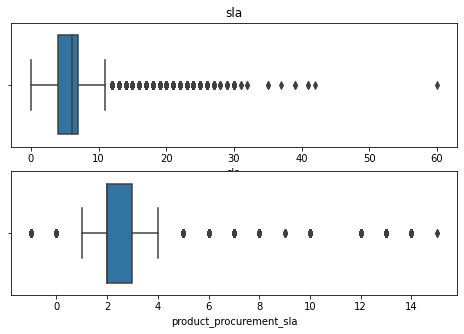

In [49]:
# Seeing the distribution/outliers of the sla and procurement sla

plt.figure(figsize=(8, 5))

plt.subplot(2, 1, 1)
sns.boxplot(x=cust_df.sla)
plt.title('sla')

plt.subplot(2, 1, 2)
sns.boxplot(x=cust_df.product_procurement_sla)

plt.show()

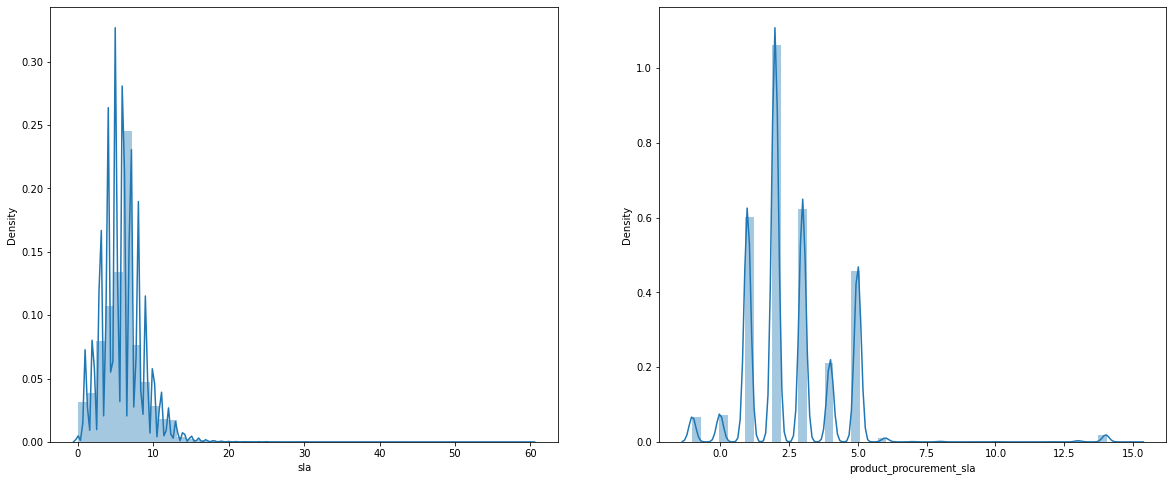

In [50]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(cust_df.sla)

plt.subplot(1,2,2)
sns.distplot(cust_df.product_procurement_sla)

plt.show()

In [51]:
# Capping the outliers for SLA, Product Procurement SLA, MRP and 

cust_df[['sla', 'product_procurement_sla']] = cust_df[['sla', 'product_procurement_sla']].apply(lambda x: x.clip(*x.quantile([0.05, 0.99])))


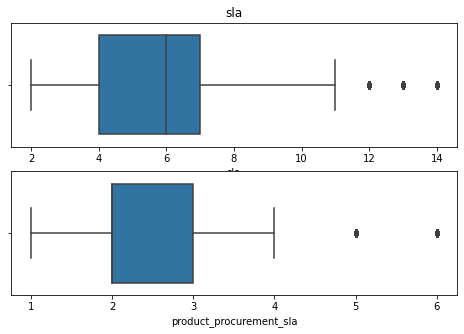

In [52]:
# Seeing the distribution/outliers of the sla and procurement sla again

plt.figure(figsize=(8, 5))

plt.subplot(2, 1, 1)
sns.boxplot(x=cust_df.sla)
plt.title('sla')

plt.subplot(2, 1, 2)
sns.boxplot(x=cust_df.product_procurement_sla)

plt.show()

## Date columns

### order_date

In [53]:
cust_df['order_date'].describe()

count                  561173
unique                 458008
top       2016-04-27 00:33:02
freq                      106
first     2015-05-19 13:42:09
last      2016-07-17 15:05:33
Name: order_date, dtype: object

In [54]:
# Checking the count of records outside this range

print("Total Records: ", cust_df.shape[0])
print("Records outside the range: ", cust_df.loc[(cust_df.order_date < '2015-07-01') | (cust_df.order_date >= '2016-07-01')].shape[0])

Total Records:  561173
Records outside the range:  200


In [55]:
# Filtering the data between July 2015 and June 2016 - as we will using that data alone in our model building
cust_df = cust_df.loc[(cust_df.order_date >= '2015-07-01')]
cust_df = cust_df.loc[(cust_df.order_date < '2016-07-01')]

In [56]:
cust_df['order_date'].describe()

count                  560973
unique                 457812
top       2016-04-27 00:33:02
freq                      106
first     2015-07-01 03:35:02
last      2016-06-30 23:58:39
Name: order_date, dtype: object

So, we have filtered the required data between July 2015 and June 2016

## Duplicates Removal or Tretment

In [57]:
cust_df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,payment_type,sla,cust_id,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,gmv_per_unit
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000.000,3419300926147000.000,6400.000,1,COD,5.000,-1.01299130778588E+018,-7.79175582905735E+018,CameraAccessory,CameraAccessory,CameraTripod,7190.000,1.000,6400.000
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.000,1420830839915200.000,6900.000,1,COD,7.000,-8.99032457905512E+018,7.33541149097431E+018,CameraAccessory,CameraAccessory,CameraTripod,7190.000,1.000,6900.000
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.000,2421912925714800.000,1990.000,1,COD,10.000,-1.0404429420466E+018,-7.47768776228657E+018,CameraAccessory,CameraAccessory,CameraTripod,2099.000,3.000,1990.000
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.000,4416592101738400.000,1690.000,1,Prepaid,4.000,-7.60496084352714E+018,-5.83593163877661E+018,CameraAccessory,CameraAccessory,CameraTripod,2099.000,3.000,1690.000
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.000,4419525153426400.000,1618.000,1,Prepaid,6.000,2.8945572083453E+018,5.34735360997242E+017,CameraAccessory,CameraAccessory,CameraTripod,2099.000,3.000,1618.000


In [58]:
print("Duplicates count before:",cust_df.duplicated().sum())
cust_df.drop_duplicates(inplace=True)
print("Duplicates count after :",cust_df.duplicated().sum())

Duplicates count before: 37169
Duplicates count after : 0


# 3. Feature Engineering

## Pricing KPI's:


1.   MRP
2.   Listed Price
3.   Discounted Price / Percent
4.   Total Price
5.   Payment type



### MRP

In [59]:
cust_df['product_mrp'].head() #We already have this feature in our dataframe

0   7190.000
1   7190.000
2   2099.000
3   2099.000
4   2099.000
Name: product_mrp, dtype: float64

### Listed Price
The listed price is nothing but a gmv/unit price

In [60]:
# As gmv/unit is the listed price, we are renaming that to the listed_price

cust_df.rename(columns={'gmv_per_unit':'listed_price'}, inplace=True)
cust_df.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'listed_price'],
      dtype='object')

### Dicount Price (w.r.t MRP)
discount% = (mrp-listed_price)*100/mrp

In [61]:
# Disount percentage

cust_df['discount_percent'] = (cust_df['product_mrp']-cust_df['listed_price'])*100/cust_df['product_mrp']
cust_df['discount_percent'].describe(percentiles=[.25, .5, .75, .8, .95, .99])

count   523804.000
mean        45.044
std         24.396
min          0.000
25%         25.926
50%         45.810
75%         62.632
80%         66.741
95%         85.477
99%         91.706
max        100.000
Name: discount_percent, dtype: float64

### Total Price
total_price = mrp*units

In [62]:
cust_df['total_price'] = cust_df['product_mrp'] * cust_df['units']
cust_df['total_price'].describe(percentiles=[.25, .5, .75, .8, .95, .99])

count   523804.000
mean      2512.026
std       4725.689
min         79.000
25%        766.000
50%       1200.000
75%       2800.000
80%       3150.000
95%       6990.000
99%      19500.000
max     250000.000
Name: total_price, dtype: float64

### Payment Type
It can be payment COD(payment at delivery) or online(payment at order).

In [63]:
# Creating the binary feature COD, 1 if it is COD, 0 if it is Online payment

cust_df['COD'] = cust_df['payment_type'].apply(lambda x: 1 if x=='COD' else 0)
cust_df['COD'].value_counts()/cust_df.shape[0]

1   0.730
0   0.270
Name: COD, dtype: float64

## Creating the week feature

In [64]:
# Creating the week number
cust_df['week'] = np.where(cust_df.Year == 2015, 
                           (cust_df.order_date.dt.week - pd.to_datetime('2015-07-01').week + 1), 
                           cust_df.order_date.dt.week+27)

# Dates like 2016-01-01 will be 53rd week as per ISO standard, hence the week value would be 53+27=80.
# We can make those values as week 27
cust_df.week.values[(cust_df.Year == 2016) & (cust_df.week == 80)] = 27

In [65]:
cust_df['week'].min(), cust_df['week'].max()

(1, 53)

## Seasonality and product sales Trend KPI's

In [66]:
# Creating the DataFrame of dates when ever there is a sale

sales_dates = pd.read_excel('/content/gdrive/MyDrive/E Commerce Capstone Project/E-Commerce Capstone Dataset/Media data and other information.xlsx', 
                            sheet_name='Special Sale Calendar', names = ['A', 'Year', 'Date Range'])

sales_dates.drop('A', inplace=True, axis=1)
sales_dates

,Year,Date Range
0,2015.000,(18-19th July)
1,nan,(15-17th Aug)
2,nan,(28-30th Aug)
3,nan,(15-17th Oct)
4,nan,(7-14th Nov)
5,nan,(25th Dec'15 - 3rd Jan'16)
6,2016.000,(20-22 Jan)
7,nan,(1-2 Feb)
8,nan,(20-21 Feb)
9,nan,(14-15 Feb)


#### Calendar

In [67]:
# Creating Calendar for the period
calendar = pd.DataFrame(pd.date_range('2015-07-01','2016-06-30').tolist(), columns = ['Date'])

# Mapping week number in the calendar
calendar['week'] = calendar.Date.dt.week

# Jan 2016 should be week 54, not week 1.
calendar['week'] = np.where((calendar['week'] <= 26) & (calendar.Date.dt.year == 2016), calendar['week']+53, calendar['week'])


#### Special Sale

In [68]:
# Dates where there is a special sale
s_dates = ["2015-07-18","2015-07-19","2015-08-15","2015-08-16","2015-08-17","2015-08-28","2015-08-29",
                      "2015-08-30","2015-10-15","2015-10-16","2015-10-17","2015-11-07","2015-11-08","2015-11-09",
                      "2015-11-10","2015-11-11","2015-11-12","2015-11-13","2015-11-14","2015-12-25","2015-12-26",
                      "2015-12-27","2015-12-28","2015-12-29","2015-12-30","2015-12-31","2016-01-01","2016-01-02",
                      "2016-01-03","2016-01-20","2016-01-21","2016-01-22","2016-02-01","2016-02-02","2016-02-14",
                      "2016-02-15","2016-02-20","2016-02-21","2016-03-07","2016-03-08","2016-03-09","2016-05-25",
                      "2016-05-26","2016-05-27"]

# Creating the DataFrame
sales_df = pd.DataFrame(s_dates, columns=['Date'])

# Making date column to date type
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

# Creating a column of special sale
sales_df['special_sale'] = 1

sales_df.head(10)

,Date,special_sale
0,2015-07-18,1
1,2015-07-19,1
2,2015-08-15,1
3,2015-08-16,1
4,2015-08-17,1
5,2015-08-28,1
6,2015-08-29,1
7,2015-08-30,1
8,2015-10-15,1
9,2015-10-16,1


In [69]:
# Merging the special sales df and calender df

calendar = calendar.merge(sales_df, how='left', on='Date')
calendar.head()

,Date,week,special_sale
0,2015-07-01,27,nan
1,2015-07-02,27,nan
2,2015-07-03,27,nan
3,2015-07-04,27,nan
4,2015-07-05,27,nan


In [70]:
# handling the null values

calendar['special_sale'].fillna(0, inplace=True)
calendar['special_sale']=calendar['special_sale'].astype(int)

In [71]:
calendar.head()

,Date,week,special_sale
0,2015-07-01,27,0
1,2015-07-02,27,0
2,2015-07-03,27,0
3,2015-07-04,27,0
4,2015-07-05,27,0


#### Payday

In [72]:
calendar['Payday'] = ((calendar['Date'].dt.day == 1) | (calendar['Date'].dt.day == 15)).astype(int)

## Climate Data

In [73]:
# Loading the climate data

climate_df_15 = pd.read_excel('/content/gdrive/MyDrive/E Commerce Capstone Project/E-Commerce Capstone Dataset/ONTARIO-2015.xlsx', skiprows=24)
climate_df_16 = pd.read_excel('/content/gdrive/MyDrive/E Commerce Capstone Project/E-Commerce Capstone Dataset/ONTARIO-2016.xlsx', skiprows=24)

In [74]:
# Dimension of the climate data

print(climate_df_15.shape)
print(climate_df_16.shape)

(365, 27)
(366, 27)


In [75]:
print(climate_df_15.info())
print(climate_df_16.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date/Time                  365 non-null    datetime64[ns]
 1   Year                       365 non-null    int64         
 2   Month                      365 non-null    int64         
 3   Day                        365 non-null    int64         
 4   Data Quality               229 non-null    object        
 5   Max Temp (°C)              216 non-null    float64       
 6   Max Temp Flag              13 non-null     object        
 7   Min Temp (°C)              190 non-null    float64       
 8   Min Temp Flag              39 non-null     object        
 9   Mean Temp (°C)             190 non-null    float64       
 10  Mean Temp Flag             39 non-null     object        
 11  Heat Deg Days (°C)         190 non-null    float64       
 12  Heat Deg

In [76]:
# Merging the 2015 and 2016 dataframe

climate_df = pd.concat([climate_df_15, climate_df_16], axis=0)
climate_df.reset_index()
climate_df.shape

(731, 27)

In [77]:
climate_df.columns.values

array(['Date/Time', 'Year', 'Month', 'Day', 'Data Quality',
       'Max Temp (°C)', 'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag',
       'Mean Temp (°C)', 'Mean Temp Flag', 'Heat Deg Days (°C)',
       'Heat Deg Days Flag', 'Cool Deg Days (°C)', 'Cool Deg Days Flag',
       'Total Rain (mm)', 'Total Rain Flag', 'Total Snow (cm)',
       'Total Snow Flag', 'Total Precip (mm)', 'Total Precip Flag',
       'Snow on Grnd (cm)', 'Snow on Grnd Flag',
       'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag',
       'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'], dtype=object)

In [78]:
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 365
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date/Time                  731 non-null    datetime64[ns]
 1   Year                       731 non-null    int64         
 2   Month                      731 non-null    int64         
 3   Day                        731 non-null    int64         
 4   Data Quality               456 non-null    object        
 5   Max Temp (°C)              442 non-null    float64       
 6   Max Temp Flag              14 non-null     object        
 7   Min Temp (°C)              409 non-null    float64       
 8   Min Temp Flag              47 non-null     object        
 9   Mean Temp (°C)             409 non-null    float64       
 10  Mean Temp Flag             47 non-null     object        
 11  Heat Deg Days (°C)         409 non-null    float64       
 12  Heat Deg

### Null values Treatment

In [79]:
nulls = (climate_df.isna().sum()*100)/climate_df.shape[0]
nulls


Date/Time                     0.000
Year                          0.000
Month                         0.000
Day                           0.000
Data Quality                 37.620
Max Temp (°C)                39.535
Max Temp Flag                98.085
Min Temp (°C)                44.049
Min Temp Flag                93.570
Mean Temp (°C)               44.049
Mean Temp Flag               93.570
Heat Deg Days (°C)           44.049
Heat Deg Days Flag           93.570
Cool Deg Days (°C)           44.049
Cool Deg Days Flag           93.570
Total Rain (mm)              37.620
Total Rain Flag              98.632
Total Snow (cm)              37.620
Total Snow Flag              97.811
Total Precip (mm)            37.620
Total Precip Flag            97.401
Snow on Grnd (cm)            37.620
Snow on Grnd Flag            98.906
Dir of Max Gust (10s deg)   100.000
Dir of Max Gust Flag        100.000
Spd of Max Gust (km/h)      100.000
Spd of Max Gust Flag        100.000
dtype: float64

In [80]:
# Filtering the higher nulls columns
nulls[nulls > 40].index.values

array(['Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag',
       'Mean Temp (°C)', 'Mean Temp Flag', 'Heat Deg Days (°C)',
       'Heat Deg Days Flag', 'Cool Deg Days (°C)', 'Cool Deg Days Flag',
       'Total Rain Flag', 'Total Snow Flag', 'Total Precip Flag',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'], dtype=object)

In [81]:
# Dropping High null percent and unimportant columns
climate_df.drop(['Data Quality','Max Temp Flag','Min Temp Flag','Mean Temp Flag',
                      'Heat Deg Days Flag','Cool Deg Days Flag','Total Rain Flag','Total Snow Flag',
                      'Total Precip Flag','Snow on Grnd Flag','Dir of Max Gust (10s deg)','Dir of Max Gust Flag',
                      'Spd of Max Gust (km/h)','Spd of Max Gust Flag'], axis=1, inplace=True)

In [82]:
climate_df.shape

(731, 13)

In [83]:
climate_df.head()

,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,2015-01-01,2015,1,1,0.000,-8.500,-4.300,22.300,0.000,0.000,0.000,0.000,0.000
1,2015-01-02,2015,1,2,3.000,-3.000,0.000,18.000,0.000,0.000,0.000,0.000,0.000
2,2015-01-03,2015,1,3,2.500,-4.000,-0.800,18.800,0.000,24.000,0.000,24.000,0.000
3,2015-01-04,2015,1,4,2.500,0.000,1.300,16.700,0.000,0.000,1.000,1.000,0.000
4,2015-01-05,2015,1,5,-10.000,-13.500,-11.800,29.800,0.000,0.000,3.000,3.000,1.000


In [84]:
climate_df['Date/Time'].describe()

count                     731
unique                    731
top       2015-07-19 00:00:00
freq                        1
first     2015-01-01 00:00:00
last      2016-12-31 00:00:00
Name: Date/Time, dtype: object

In [85]:
# Filtering the data between July 2015 to June 2016

climate_df = climate_df[(climate_df['Month'] >= 7) & (climate_df['Year'] == 2015) 
                               |(climate_df['Month'] <= 6) & (climate_df['Year'] == 2016)]

In [86]:
climate_df['Date/Time'].describe()

count                     366
unique                    366
top       2015-07-19 00:00:00
freq                        1
first     2015-07-01 00:00:00
last      2016-06-30 00:00:00
Name: Date/Time, dtype: object

In [87]:
# Checking the null percentage again

nulls = (climate_df.isna().sum()*100)/climate_df.shape[0]
nulls

Date/Time             0.000
Year                  0.000
Month                 0.000
Day                   0.000
Max Temp (°C)        43.169
Min Temp (°C)        47.814
Mean Temp (°C)       47.814
Heat Deg Days (°C)   47.814
Cool Deg Days (°C)   47.814
Total Rain (mm)      41.257
Total Snow (cm)      41.257
Total Precip (mm)    41.257
Snow on Grnd (cm)    41.257
dtype: float64

In [88]:
nulls.index.values

array(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp (°C)',
       'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)',
       'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Total Precip (mm)', 'Snow on Grnd (cm)'], dtype=object)

In [89]:
# Imputing the null columns

cols = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)',
       'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Total Precip (mm)', 'Snow on Grnd (cm)']

for c in cols:
  climate_df[c].fillna(climate_df[c].mean(), inplace=True)

nulls = (climate_df.isna().sum()*100)/climate_df.shape[0]
nulls


Date/Time            0.000
Year                 0.000
Month                0.000
Day                  0.000
Max Temp (°C)        0.000
Min Temp (°C)        0.000
Mean Temp (°C)       0.000
Heat Deg Days (°C)   0.000
Cool Deg Days (°C)   0.000
Total Rain (mm)      0.000
Total Snow (cm)      0.000
Total Precip (mm)    0.000
Snow on Grnd (cm)    0.000
dtype: float64

In [90]:
# Adding the week number to the climate dataframe

climate_df['week'] = climate_df['Date/Time'].dt.week
climate_df['week'] = np.where((climate_df['week'] <= 26) & (climate_df['Year'] == 2016), 
                              climate_df['week']+53, climate_df['week'])


In [91]:
climate_df.head(10)

,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),week
181,2015-07-01,2015,7,1,24.500,17.000,20.800,0.000,2.800,0.000,0.000,0.000,0.000,27
182,2015-07-02,2015,7,2,24.000,14.000,19.000,0.000,1.000,0.000,0.000,0.000,0.000,27
183,2015-07-03,2015,7,3,25.000,10.000,17.500,0.500,0.000,0.000,0.000,0.000,0.000,27
184,2015-07-04,2015,7,4,26.000,11.000,18.500,0.000,0.500,0.000,0.000,0.000,0.000,27
185,2015-07-05,2015,7,5,28.000,14.000,21.000,0.000,3.000,0.000,0.000,0.000,0.000,27
186,2015-07-06,2015,7,6,19.178,8.696,14.241,5.712,1.953,2.584,0.205,2.788,0.288,28
187,2015-07-07,2015,7,7,26.000,18.000,22.000,0.000,4.000,8.600,0.000,8.600,0.000,28
188,2015-07-08,2015,7,8,20.000,12.500,16.300,1.700,0.000,14.400,0.000,14.400,0.000,28
189,2015-07-09,2015,7,9,24.000,17.000,20.500,0.000,2.500,3.500,0.000,3.500,0.000,28
190,2015-07-10,2015,7,10,26.000,13.000,19.500,0.000,1.500,0.000,0.000,0.000,0.000,28


In [92]:
# Inspecting the numeric features again

climate_df.describe(percentiles=[.25, .5, .75, .9, .95, .99])

,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),week
count,366.000,366.000,366.000,366.000,366.000,366.000,366.000,366.000,366.000,366.000,366.000,366.000,366.000
mean,2015.497,6.514,15.757,19.178,8.696,14.241,5.712,1.953,2.584,0.205,2.788,0.288,52.929
std,0.501,3.456,8.824,7.422,6.319,6.451,5.082,2.030,5.118,0.867,5.228,1.147,15.119
min,2015.000,1.000,1.000,-8.500,-18.000,-12.300,0.000,0.000,0.000,0.000,0.000,0.000,27.000
25%,2015.000,4.000,8.000,18.500,8.696,14.241,1.700,0.000,0.000,0.000,0.000,0.000,40.000
50%,2015.000,7.000,16.000,19.178,8.696,14.241,5.712,1.953,2.584,0.000,2.788,0.000,53.000
75%,2016.000,9.750,23.000,22.500,11.000,16.300,5.712,1.953,2.584,0.205,2.788,0.288,66.000
90%,2016.000,11.000,28.000,30.000,17.000,22.900,11.500,4.900,3.800,0.205,4.700,0.288,74.000
95%,2016.000,12.000,29.000,31.000,19.000,24.800,17.075,6.800,10.100,0.205,10.200,0.288,76.000
99%,2016.000,12.000,31.000,33.675,21.000,26.675,21.675,8.675,27.870,5.350,28.770,7.000,78.350


## Net Promoters Score & Stock_Index

In [93]:
path = '/content/gdrive/MyDrive/E Commerce Capstone Project/E-Commerce Capstone Dataset/Media data and other information.xlsx'
nps_df = pd.read_excel(path, sheet_name='Monthly NPS Score', skiprows=1)
nps_df.head()

,NPS,54.599588092376216,59.987101024,46.925418687263985,44.3983889339963,46.99999999999999,45.8,47.09303132503366,50.32740649908032,49.02055041461363,51.82760501909438,47.306951226359324,50.516687050376724
0,Stock Index,1177,1206,1101,1210,1233,1038,1052,1222,1015,1242,1228,1194


In [94]:
# Transforming the dataframe

nps_df = nps_df.T.reset_index()
nps_df.columns = ['NPS','Stock_Index']
nps_df.head()

,NPS,Stock_Index
0,NPS,Stock Index
1,54.600,1177
2,59.987,1206
3,46.925,1101
4,44.398,1210


In [95]:
# Dropping the first record of the DataFrame

nps_df.drop(axis=0, index=0, inplace=True)
nps_df.reset_index(inplace=True, drop=True)
nps_df.head()

,NPS,Stock_Index
0,54.600,1177
1,59.987,1206
2,46.925,1101
3,44.398,1210
4,47.000,1233


In [96]:
# Creating Month and Year feature

nps_df['Month'] = pd.Series([7,8,9,10,11,12,1,2,3,4,5,6])
nps_df['Year'] = pd.Series([2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016])

In [97]:
nps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NPS          12 non-null     object
 1   Stock_Index  12 non-null     object
 2   Month        12 non-null     int64 
 3   Year         12 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 512.0+ bytes


In [98]:
# Coverting the nps and stock_index to right data form

nps_df['NPS'] = nps_df['NPS'].astype(float)
nps_df['Stock_Index'] = nps_df['Stock_Index'].astype(float)

In [99]:
nps_df.head()

,NPS,Stock_Index,Month,Year
0,54.600,1177.000,7,2015
1,59.987,1206.000,8,2015
2,46.925,1101.000,9,2015
3,44.398,1210.000,10,2015
4,47.000,1233.000,11,2015


## Advertisement related KPI

In [100]:
# Reading the csv files

path = '/content/gdrive/MyDrive/E Commerce Capstone Project/E-Commerce Capstone Dataset/Media data and other information.xlsx'
adv_df = pd.read_excel(path, sheet_name='Media Investment', skipfooter = 4, skiprows=2)
adv_df.head()

,Unnamed: 0,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,nan,2015,7,17.062,0.215,2.533,7.414,0.001,1.327,0.547,5.024,nan,nan
1,nan,2015,8,5.064,0.006,1.278,1.063,0.000,0.129,0.074,2.514,nan,nan
2,nan,2015,9,96.254,3.880,1.357,62.788,0.610,16.380,5.038,6.202,nan,nan
3,nan,2015,10,170.156,6.145,12.622,84.673,3.444,24.372,6.974,31.927,nan,nan
4,nan,2015,11,51.216,4.221,1.275,14.172,0.169,19.562,6.596,5.222,nan,nan


In [101]:
# General info

adv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         0 non-null      float64
 1   Year               12 non-null     int64  
 2   Month              12 non-null     int64  
 3   Total Investment   12 non-null     float64
 4   TV                 12 non-null     float64
 5   Digital            12 non-null     float64
 6   Sponsorship        12 non-null     float64
 7   Content Marketing  12 non-null     float64
 8   Online marketing   12 non-null     float64
 9    Affiliates        12 non-null     float64
 10  SEM                12 non-null     float64
 11  Radio              3 non-null      float64
 12  Other              3 non-null      float64
dtypes: float64(11), int64(2)
memory usage: 1.3 KB


### Null values treatment

In [102]:
# Checking nulls count

adv_df.isna().sum()*100/adv_df.shape[0]

Unnamed: 0          100.000
Year                  0.000
Month                 0.000
Total Investment      0.000
TV                    0.000
Digital               0.000
Sponsorship           0.000
Content Marketing     0.000
Online marketing      0.000
 Affiliates           0.000
SEM                   0.000
Radio                75.000
Other                75.000
dtype: float64

In [103]:
# Handling the null values

adv_df.drop(columns=['Unnamed: 0'], axis=1, inplace=True) #dropping this as it has cent percent nulls

# We have other columns such as Radio and other, let impute them with zero,
# as those could be months where there is no budget allocation for those streams

adv_df.fillna(0, axis=1, inplace = True)

# Checking nulls count again

adv_df.isna().sum()*100/adv_df.shape[0]

Year                0.000
Month               0.000
Total Investment    0.000
TV                  0.000
Digital             0.000
Sponsorship         0.000
Content Marketing   0.000
Online marketing    0.000
 Affiliates         0.000
SEM                 0.000
Radio               0.000
Other               0.000
dtype: float64

In [104]:
# Creating the date feature

adv_df['Date'] = pd.to_datetime(adv_df[['Year', 'Month']].assign(DAY=1))

# Correcting the naming of couple of columns

adv_df.rename(columns={'Content Marketing':'Content', 'Online marketing':'Online', ' Affiliates':'Affiliates'}, inplace=True)

adv_df.head()


,Year,Month,Total Investment,TV,Digital,Sponsorship,Content,Online,Affiliates,SEM,Radio,Other,Date
0,2015,7,17.062,0.215,2.533,7.414,0.001,1.327,0.547,5.024,0.000,0.000,2015-07-01
1,2015,8,5.064,0.006,1.278,1.063,0.000,0.129,0.074,2.514,0.000,0.000,2015-08-01
2,2015,9,96.254,3.880,1.357,62.788,0.610,16.380,5.038,6.202,0.000,0.000,2015-09-01
3,2015,10,170.156,6.145,12.622,84.673,3.444,24.372,6.974,31.927,0.000,0.000,2015-10-01
4,2015,11,51.216,4.221,1.275,14.172,0.169,19.562,6.596,5.222,0.000,0.000,2015-11-01


In [105]:
adv_df.set_index('Date', inplace = True)
adv_df

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content,Online,Affiliates,SEM,Radio,Other
Date,,,,,,,,,,,,
2015-07-01,2015,7,17.062,0.215,2.533,7.414,0.001,1.327,0.547,5.024,0.000,0.000
2015-08-01,2015,8,5.064,0.006,1.278,1.063,0.000,0.129,0.074,2.514,0.000,0.000
2015-09-01,2015,9,96.254,3.880,1.357,62.788,0.610,16.380,5.038,6.202,0.000,0.000
2015-10-01,2015,10,170.156,6.145,12.622,84.673,3.444,24.372,6.974,31.927,0.000,0.000
2015-11-01,2015,11,51.216,4.221,1.275,14.172,0.169,19.562,6.596,5.222,0.000,0.000
2015-12-01,2015,12,106.745,5.398,3.063,56.705,1.067,22.504,6.827,11.181,0.000,0.000
2016-01-01,2016,1,74.196,4.380,0.456,4.200,0.900,22.900,7.370,4.200,2.700,27.090
2016-02-01,2016,2,48.052,2.586,1.913,11.726,0.597,19.892,6.465,4.874,0.000,0.000
2016-03-01,2016,3,100.025,9.300,2.100,41.590,0.370,18.438,6.218,5.194,0.870,15.946


In [106]:
# Add new next month at the end for the dataframe

end = adv_df.index[-1] + pd.offsets.MonthBegin(1)
print(end)
adv_df = adv_df.append(adv_df.iloc[[-1]].rename({adv_df.index[-1]: end}))
adv_df



2016-07-01 00:00:00


,Year,Month,Total Investment,TV,Digital,Sponsorship,Content,Online,Affiliates,SEM,Radio,Other
Date,,,,,,,,,,,,
2015-07-01,2015,7,17.062,0.215,2.533,7.414,0.001,1.327,0.547,5.024,0.000,0.000
2015-08-01,2015,8,5.064,0.006,1.278,1.063,0.000,0.129,0.074,2.514,0.000,0.000
2015-09-01,2015,9,96.254,3.880,1.357,62.788,0.610,16.380,5.038,6.202,0.000,0.000
2015-10-01,2015,10,170.156,6.145,12.622,84.673,3.444,24.372,6.974,31.927,0.000,0.000
2015-11-01,2015,11,51.216,4.221,1.275,14.172,0.169,19.562,6.596,5.222,0.000,0.000
2015-12-01,2015,12,106.745,5.398,3.063,56.705,1.067,22.504,6.827,11.181,0.000,0.000
2016-01-01,2016,1,74.196,4.380,0.456,4.200,0.900,22.900,7.370,4.200,2.700,27.090
2016-02-01,2016,2,48.052,2.586,1.913,11.726,0.597,19.892,6.465,4.874,0.000,0.000
2016-03-01,2016,3,100.025,9.300,2.100,41.590,0.370,18.438,6.218,5.194,0.870,15.946


In [107]:
#Resampling the data on weekly frequency
adv_df = adv_df.resample('W').ffill().iloc[:-1]
adv_df

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content,Online,Affiliates,SEM,Radio,Other
Date,,,,,,,,,,,,
2015-07-05,2015,7,17.062,0.215,2.533,7.414,0.001,1.327,0.547,5.024,0.000,0.000
2015-07-12,2015,7,17.062,0.215,2.533,7.414,0.001,1.327,0.547,5.024,0.000,0.000
2015-07-19,2015,7,17.062,0.215,2.533,7.414,0.001,1.327,0.547,5.024,0.000,0.000
2015-07-26,2015,7,17.062,0.215,2.533,7.414,0.001,1.327,0.547,5.024,0.000,0.000
2015-08-02,2015,8,5.064,0.006,1.278,1.063,0.000,0.129,0.074,2.514,0.000,0.000
2015-08-09,2015,8,5.064,0.006,1.278,1.063,0.000,0.129,0.074,2.514,0.000,0.000
2015-08-16,2015,8,5.064,0.006,1.278,1.063,0.000,0.129,0.074,2.514,0.000,0.000
2015-08-23,2015,8,5.064,0.006,1.278,1.063,0.000,0.129,0.074,2.514,0.000,0.000
2015-08-30,2015,8,5.064,0.006,1.278,1.063,0.000,0.129,0.074,2.514,0.000,0.000


In [108]:
adv_df.columns

Index(['Year', 'Month', 'Total Investment', 'TV', 'Digital', 'Sponsorship',
       'Content', 'Online', 'Affiliates', 'SEM', 'Radio', 'Other'],
      dtype='object')

In [109]:
adv_df['Total Investment'] /= adv_df.resample('MS')['Total Investment'].transform('size')
adv_df['TV'] /= adv_df.resample('MS')['TV'].transform('size')
adv_df['Digital'] /= adv_df.resample('MS')['Digital'].transform('size')
adv_df['Sponsorship'] /= adv_df.resample('MS')['Sponsorship'].transform('size')
adv_df['Content'] /= adv_df.resample('MS')['Content'].transform('size')
adv_df['Online'] /= adv_df.resample('MS')['Online'].transform('size')
adv_df['Affiliates'] /= adv_df.resample('MS')['Affiliates'].transform('size')
adv_df['SEM'] /= adv_df.resample('MS')['SEM'].transform('size')
adv_df['Radio'] /= adv_df.resample('MS')['Radio'].transform('size')
adv_df['Other'] /= adv_df.resample('MS')['Other'].transform('size')

In [110]:
# Adding the feature week to our adv_df

adv_df.reset_index(inplace = True)
adv_df['Date'] = pd.to_datetime(adv_df['Date'])

# creating the week number
adv_df['week'] = np.where(adv_df.Date.dt.year == 2015, (adv_df.Date.dt.week - pd.to_datetime('2015-07-01').week + 1), adv_df.Date.dt.week+27)

adv_df.week.values[(adv_df.Date.dt.year == 2016) & (adv_df.week == 80)] = 27
adv_df.sort_values('week', inplace = True)

In [111]:
adv_df.head()

,Date,Year,Month,Total Investment,TV,Digital,Sponsorship,Content,Online,Affiliates,SEM,Radio,Other,week
0,2015-07-05,2015,7,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,1
1,2015-07-12,2015,7,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,2
2,2015-07-19,2015,7,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,3
3,2015-07-26,2015,7,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,4
4,2015-08-02,2015,8,1.013,0.001,0.256,0.213,0.000,0.026,0.015,0.503,0.000,0.000,5


### Adstock

In [112]:
# Creating the function for Adstock

def adstock(adstock_rate, adv_channel):
  adstock_effect = []
  for i in range(len(adv_channel)):
    if i == 0: 
      adstock_effect.append(adv_channel.iloc[i])
    else:
      adstock_effect.append(adv_channel.iloc[i] + adstock_rate * adv_channel.iloc[i-1])
  return adstock_effect

In [113]:
adv_df.columns

Index(['Date', 'Year', 'Month', 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content', 'Online', 'Affiliates', 'SEM', 'Radio',
       'Other', 'week'],
      dtype='object')

In [114]:
# Creating the DataFrame for the adstock

adstock_df = pd.DataFrame()
for col in ['TV', 'Digital', 'Sponsorship', 'Content', 'Online', 'Affiliates', 'SEM', 'Radio','Other']:
  adstock_df[col+"_adstock"] = adstock(0.5, adv_df[col])
  

In [115]:
adstock_df.head()

,TV_adstock,Digital_adstock,Sponsorship_adstock,Content_adstock,Online_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000
1,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000
2,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000
3,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000
4,0.028,0.572,1.139,0.000,0.192,0.083,1.131,0.000,0.000


### Merging the advertising and the adstock data frame

In [116]:
adv_df_final = pd.concat([adv_df, adstock_df], axis=1)
adv_df_final.head()

,Date,Year,Month,Total Investment,TV,Digital,Sponsorship,Content,Online,Affiliates,SEM,Radio,Other,week,TV_adstock,Digital_adstock,Sponsorship_adstock,Content_adstock,Online_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,2015-07-05,2015,7,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,1,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000
1,2015-07-12,2015,7,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,2,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000
2,2015-07-19,2015,7,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,3,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000
3,2015-07-26,2015,7,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,4,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000
4,2015-08-02,2015,8,1.013,0.001,0.256,0.213,0.000,0.026,0.015,0.503,0.000,0.000,5,0.028,0.572,1.139,0.000,0.192,0.083,1.131,0.000,0.000


## Luxury or Mass Market product

If GMV is greater than 80 percentile, then the product is called as luxury product, else mass market product


In [117]:
cust_df[['gmv', 'product_mrp']].describe(percentiles=[.25, .5, .75, .8, .9, .95, .99])

,gmv,product_mrp
count,523804.000,523804.000
mean,1282.947,2476.916
std,2426.878,4663.343
min,0.000,79.000
25%,299.000,749.000
50%,549.000,1200.000
75%,1499.000,2790.000
80%,1890.000,3001.000
90%,2799.000,5399.000
95%,4050.000,6990.000


In [118]:
cust_df[['product_analytic_category', 'product_analytic_sub_category',	'product_analytic_vertical']].value_counts()

product_analytic_category  product_analytic_sub_category  product_analytic_vertical
EntertainmentSmall         HomeAudio                      HomeAudioSpeaker             79925
GamingHardware             GamingAccessory                GamingHeadset                59944
                                                          GamePad                      53685
CameraAccessory            CameraAccessory                Flash                        47821
                                                          CameraBattery                35708
GamingHardware             GamingAccessory                GamingMouse                  35651
CameraAccessory            CameraAccessory                CameraTripod                 33329
                                                          Lens                         32811
EntertainmentSmall         HomeAudio                      FMRadio                      25431
CameraAccessory            CameraAccessory                CameraBag            

In [119]:
# Creating the Pivot table based on mrp, gmv and units
prem_df = pd.pivot_table(data=cust_df, values=['product_mrp', 'units', 'gmv'], index='product_analytic_vertical', aggfunc={'units':np.sum, 'product_mrp':np.mean, 'gmv':np.sum})
prem_df.reset_index(inplace=True)

In [120]:
# Creating the premium product feature - 

prem_df['premium_product'] = np.where((prem_df.product_mrp>cust_df.product_mrp.quantile(0.9)),1,0)
prem_df[prem_df.premium_product==1]

,product_analytic_vertical,gmv,product_mrp,units,premium_product
10,CameraLEDLight,20215.000,6738.333,3,1
16,DJController,2335536.000,17692.871,191,1
39,KaraokePlayer,23500.000,12000.000,2,1
41,MotionController,4373797.000,5764.000,1132,1
43,SlingBox,20495.000,7999.000,5,1
45,SoundMixer,638073.000,12271.377,69,1
48,Teleconverter,15299.000,20490.000,1,1


In [121]:
# Checking the number of premium products

luxury_products = prem_df[prem_df.premium_product==1]['product_analytic_vertical'].to_list()
luxury_products

['CameraLEDLight',
 'DJController',
 'KaraokePlayer',
 'MotionController',
 'SlingBox',
 'SoundMixer',
 'Teleconverter']

Above are the products of the premium segment, we build our model for the mass market products, so lets try to filter them

In [122]:
cust_df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,payment_type,sla,cust_id,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,listed_price,discount_percent,total_price,COD,week
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000.000,3419300926147000.000,6400.000,1,COD,5.000,-1.01299130778588E+018,-7.79175582905735E+018,CameraAccessory,CameraAccessory,CameraTripod,7190.000,1.000,6400.000,10.987,7190.000,1,16
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.000,1420830839915200.000,6900.000,1,COD,7.000,-8.99032457905512E+018,7.33541149097431E+018,CameraAccessory,CameraAccessory,CameraTripod,7190.000,1.000,6900.000,4.033,7190.000,1,17
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.000,2421912925714800.000,1990.000,1,COD,10.000,-1.0404429420466E+018,-7.47768776228657E+018,CameraAccessory,CameraAccessory,CameraTripod,2099.000,3.000,1990.000,5.193,2099.000,1,17
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.000,4416592101738400.000,1690.000,1,Prepaid,4.000,-7.60496084352714E+018,-5.83593163877661E+018,CameraAccessory,CameraAccessory,CameraTripod,2099.000,3.000,1690.000,19.485,2099.000,0,16
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.000,4419525153426400.000,1618.000,1,Prepaid,6.000,2.8945572083453E+018,5.34735360997242E+017,CameraAccessory,CameraAccessory,CameraTripod,2099.000,3.000,1618.000,22.916,2099.000,0,16


In [123]:
# Adding the luxury product feature to our Customer DataFrame

cust_df['luxury_product'] = cust_df['product_analytic_vertical'].apply(lambda x: 1 if x in luxury_products else 0)
cust_df['luxury_product'].value_counts()/cust_df.shape[0]

0   0.997
1   0.003
Name: luxury_product, dtype: float64

In [124]:
# Filtering the products of 'Mass Market' alone for our modeling purpose

print(cust_df.shape)
cust_df = cust_df[cust_df.luxury_product == 0]
cust_df.shape


(523804, 23)


(522431, 23)

## Merging the various DataFrames and KPI as one DataFrame

In [125]:
# Customer DataFrame

cust_df.sort_values(by='week', inplace=True)
cust_df.reset_index(inplace=True, drop=True)
cust_df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,payment_type,sla,cust_id,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,listed_price,discount_percent,total_price,COD,week,luxury_product
0,ACCDAGSHU2ZYMHCF,2015-07-03 17:43:56,2015,7,166217848.000,210948784.000,595.000,1,Prepaid,4.000,-2.8220942051791E+018,-9.03104320709149E+018,CameraAccessory,CameraAccessory,CameraTripod,1450.000,4.000,595.000,58.966,1450.000,0,1,0
1,ACCDYH2ZFYHY5H9N,2015-07-03 09:21:52,2015,7,165905953.000,210586947.000,2280.000,1,Prepaid,4.000,-5.08356752247645E+018,6.51333054134398E+018,GamingHardware,GamingAccessory,GamePad,3500.000,2.000,2280.000,34.857,3500.000,0,1,0
2,ACCEFUJRZ5ZCJKYT,2015-07-01 09:02:59,2015,7,165187825.000,209752531.000,2249.000,1,Prepaid,7.000,-8.65906252854915E+018,4.79427064452622E+017,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,2800.000,4.000,2249.000,19.679,2800.000,0,1,0
3,ACCDTREV54TU7YFE,2015-07-03 15:37:10,2015,7,166165646.000,210887789.000,1370.000,1,Prepaid,2.000,-5.00577650925696E+018,-7.85171351840022E+018,GamingHardware,GamingAccessory,GamingMouse,1370.000,1.000,1370.000,0.000,1370.000,0,1,0
4,ACCDFYZ479GFENYC,2015-07-03 16:48:46,2015,7,166195856.000,210923177.000,356.000,1,Prepaid,2.000,-1.03044801023847E+018,-7.26705000883775E+018,CameraAccessory,CameraAccessory,CameraBatteryCharger,356.000,1.000,356.000,0.000,356.000,0,1,0


In [126]:
calendar.sort_values(by='week', inplace=True)
calendar.reset_index(inplace=True, drop=True)
calendar.head()

,Date,week,special_sale,Payday
0,2015-07-01,27,0,1
1,2015-07-02,27,0,0
2,2015-07-03,27,0,0
3,2015-07-04,27,0,0
4,2015-07-05,27,0,0


In [127]:
# Climate Data Frame

climate_df.sort_values(by='week', inplace=True)
climate_df.reset_index(inplace=True, drop=True)
climate_df.rename(columns={'Date/Time':'Date'}, inplace=True)
climate_df.head()

,Date,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),week
0,2015-07-01,2015,7,1,24.500,17.000,20.800,0.000,2.800,0.000,0.000,0.000,0.000,27
1,2015-07-02,2015,7,2,24.000,14.000,19.000,0.000,1.000,0.000,0.000,0.000,0.000,27
2,2015-07-03,2015,7,3,25.000,10.000,17.500,0.500,0.000,0.000,0.000,0.000,0.000,27
3,2015-07-04,2015,7,4,26.000,11.000,18.500,0.000,0.500,0.000,0.000,0.000,0.000,27
4,2015-07-05,2015,7,5,28.000,14.000,21.000,0.000,3.000,0.000,0.000,0.000,0.000,27


In [128]:
# NPS Data Frame

nps_df.head()

,NPS,Stock_Index,Month,Year
0,54.600,1177.000,7,2015
1,59.987,1206.000,8,2015
2,46.925,1101.000,9,2015
3,44.398,1210.000,10,2015
4,47.000,1233.000,11,2015


In [129]:
# Advertising Data Frame

adv_df.sort_values(by='week', inplace=True)
adv_df.reset_index(inplace=True, drop=True)
adv_df.head()

,Date,Year,Month,Total Investment,TV,Digital,Sponsorship,Content,Online,Affiliates,SEM,Radio,Other,week
0,2015-07-05,2015,7,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,1
1,2015-07-12,2015,7,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,2
2,2015-07-19,2015,7,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,3
3,2015-07-26,2015,7,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,4
4,2015-08-02,2015,8,1.013,0.001,0.256,0.213,0.000,0.026,0.015,0.503,0.000,0.000,5


In [130]:
# Merging the Calender and Climate DataFrames

calendar = calendar.merge(climate_df, 'left', on='Date')
calendar.head()

,Date,week_x,special_sale,Payday,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),week_y
0,2015-07-01,27,0,1,2015,7,1,24.500,17.000,20.800,0.000,2.800,0.000,0.000,0.000,0.000,27
1,2015-07-02,27,0,0,2015,7,2,24.000,14.000,19.000,0.000,1.000,0.000,0.000,0.000,0.000,27
2,2015-07-03,27,0,0,2015,7,3,25.000,10.000,17.500,0.500,0.000,0.000,0.000,0.000,0.000,27
3,2015-07-04,27,0,0,2015,7,4,26.000,11.000,18.500,0.000,0.500,0.000,0.000,0.000,0.000,27
4,2015-07-05,27,0,0,2015,7,5,28.000,14.000,21.000,0.000,3.000,0.000,0.000,0.000,0.000,27


In [131]:
nps_df.shape

(12, 4)

In [132]:
# Merging the climate and nps Data Frames

calendar = calendar.merge(nps_df, 'left', on=['Month', 'Year'])
calendar.head()

,Date,week_x,special_sale,Payday,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),week_y,NPS,Stock_Index
0,2015-07-01,27,0,1,2015,7,1,24.500,17.000,20.800,0.000,2.800,0.000,0.000,0.000,0.000,27,54.600,1177.000
1,2015-07-02,27,0,0,2015,7,2,24.000,14.000,19.000,0.000,1.000,0.000,0.000,0.000,0.000,27,54.600,1177.000
2,2015-07-03,27,0,0,2015,7,3,25.000,10.000,17.500,0.500,0.000,0.000,0.000,0.000,0.000,27,54.600,1177.000
3,2015-07-04,27,0,0,2015,7,4,26.000,11.000,18.500,0.000,0.500,0.000,0.000,0.000,0.000,27,54.600,1177.000
4,2015-07-05,27,0,0,2015,7,5,28.000,14.000,21.000,0.000,3.000,0.000,0.000,0.000,0.000,27,54.600,1177.000


In [133]:
# Dropping the week and creating the new one which is in align with the customer and Advertising Data Frames

calendar.drop(columns=['week_x', 'week_y'], axis=1, inplace=True)

# Creating the new Week feature

calendar['week'] = np.where(calendar.Date.dt.year == 2015, 
                            (calendar.Date.dt.week - pd.to_datetime('2015-07-01').week + 1), 
                            calendar.Date.dt.week+27)

# Making the week number 80 as week 27
calendar.week.values[(calendar.Date.dt.year == 2016) & (calendar.week == 80)] = 27

In [134]:
calendar.head()

,Date,special_sale,Payday,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),NPS,Stock_Index,week
0,2015-07-01,0,1,2015,7,1,24.500,17.000,20.800,0.000,2.800,0.000,0.000,0.000,0.000,54.600,1177.000,1
1,2015-07-02,0,0,2015,7,2,24.000,14.000,19.000,0.000,1.000,0.000,0.000,0.000,0.000,54.600,1177.000,1
2,2015-07-03,0,0,2015,7,3,25.000,10.000,17.500,0.500,0.000,0.000,0.000,0.000,0.000,54.600,1177.000,1
3,2015-07-04,0,0,2015,7,4,26.000,11.000,18.500,0.000,0.500,0.000,0.000,0.000,0.000,54.600,1177.000,1
4,2015-07-05,0,0,2015,7,5,28.000,14.000,21.000,0.000,3.000,0.000,0.000,0.000,0.000,54.600,1177.000,1


In [135]:
# Rolling up the data to weekly level

calendar_weekly = calendar.groupby(by=['week']).mean()
calendar_weekly.head(50)

,special_sale,Payday,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),NPS,Stock_Index
week,,,,,,,,,,,,,,,,
1,0.000,0.200,2015.000,7.000,3.000,25.500,13.200,19.360,0.100,1.460,0.000,0.000,0.000,0.000,54.600,1177.000
2,0.000,0.000,2015.000,7.000,9.000,24.025,14.385,19.263,1.059,2.322,4.155,0.029,4.184,0.041,54.600,1177.000
3,0.286,0.143,2015.000,7.000,16.000,27.383,16.314,21.906,0.816,4.722,1.569,0.029,1.598,0.041,54.600,1177.000
4,0.000,0.000,2015.000,7.000,23.000,28.240,14.342,20.540,1.632,4.172,1.141,0.029,1.170,0.041,54.600,1177.000
5,0.000,0.143,2015.000,7.286,21.143,29.811,16.242,23.092,0.816,5.908,4.341,0.029,4.370,0.041,56.139,1185.286
6,0.000,0.000,2015.000,8.000,6.000,24.908,12.870,18.475,2.448,2.923,0.938,0.058,0.997,0.082,59.987,1206.000
7,0.286,0.143,2015.000,8.000,13.000,25.148,14.156,19.789,2.448,4.237,2.764,0.088,2.852,0.124,59.987,1206.000
8,0.143,0.000,2015.000,8.000,20.000,27.097,17.028,22.134,0.816,4.950,4.769,0.029,4.798,0.041,59.987,1206.000
9,0.429,0.000,2015.000,8.000,27.000,20.556,10.926,15.958,4.294,2.252,1.846,0.146,1.992,0.206,59.987,1206.000


In [136]:
# Merging Calendar and adv_df

adv_df_final.drop(columns=['Date', 'Year', 'Month'], axis=1, inplace=True)
calendar_weekly = calendar_weekly.merge(adv_df_final, on='week')
calendar_weekly.head(10)

,week,special_sale,Payday,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),NPS,Stock_Index,Total Investment,TV,Digital,Sponsorship,Content,Online,Affiliates,SEM,Radio,Other,TV_adstock,Digital_adstock,Sponsorship_adstock,Content_adstock,Online_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,1,0.000,0.200,2015.000,7.000,3.000,25.500,13.200,19.360,0.100,1.460,0.000,0.000,0.000,0.000,54.600,1177.000,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000
1,2,0.000,0.000,2015.000,7.000,9.000,24.025,14.385,19.263,1.059,2.322,4.155,0.029,4.184,0.041,54.600,1177.000,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000
2,3,0.286,0.143,2015.000,7.000,16.000,27.383,16.314,21.906,0.816,4.722,1.569,0.029,1.598,0.041,54.600,1177.000,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000
3,4,0.000,0.000,2015.000,7.000,23.000,28.240,14.342,20.540,1.632,4.172,1.141,0.029,1.170,0.041,54.600,1177.000,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000
4,5,0.000,0.143,2015.000,7.286,21.143,29.811,16.242,23.092,0.816,5.908,4.341,0.029,4.370,0.041,56.139,1185.286,1.013,0.001,0.256,0.213,0.000,0.026,0.015,0.503,0.000,0.000,0.028,0.572,1.139,0.000,0.192,0.083,1.131,0.000,0.000
5,6,0.000,0.000,2015.000,8.000,6.000,24.908,12.870,18.475,2.448,2.923,0.938,0.058,0.997,0.082,59.987,1206.000,1.013,0.001,0.256,0.213,0.000,0.026,0.015,0.503,0.000,0.000,0.002,0.383,0.319,0.000,0.039,0.022,0.754,0.000,0.000
6,7,0.286,0.143,2015.000,8.000,13.000,25.148,14.156,19.789,2.448,4.237,2.764,0.088,2.852,0.124,59.987,1206.000,1.013,0.001,0.256,0.213,0.000,0.026,0.015,0.503,0.000,0.000,0.002,0.383,0.319,0.000,0.039,0.022,0.754,0.000,0.000
7,8,0.143,0.000,2015.000,8.000,20.000,27.097,17.028,22.134,0.816,4.950,4.769,0.029,4.798,0.041,59.987,1206.000,1.013,0.001,0.256,0.213,0.000,0.026,0.015,0.503,0.000,0.000,0.002,0.383,0.319,0.000,0.039,0.022,0.754,0.000,0.000
8,9,0.429,0.000,2015.000,8.000,27.000,20.556,10.926,15.958,4.294,2.252,1.846,0.146,1.992,0.206,59.987,1206.000,1.013,0.001,0.256,0.213,0.000,0.026,0.015,0.503,0.000,0.000,0.002,0.383,0.319,0.000,0.039,0.022,0.754,0.000,0.000
9,10,0.000,0.143,2015.000,8.857,7.429,28.811,15.842,21.540,1.632,5.172,9.026,0.029,9.055,0.041,48.791,1116.000,24.064,0.970,0.339,15.697,0.153,4.095,1.260,1.551,0.000,0.000,0.971,0.467,15.803,0.153,4.108,1.267,1.802,0.000,0.000


# Aggregation of Data - For weekly basis based on sub-categories

## Camera Accessories

Basically we have two Data Frames-
one is calendar_weekly - which has details of Climate details, stock information, advertising spends and adstock effect.
Second is customer dataframe which has the details of the Customer purchases and products details of the mass market

In [137]:
cust_df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,payment_type,sla,cust_id,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,listed_price,discount_percent,total_price,COD,week,luxury_product
0,ACCDAGSHU2ZYMHCF,2015-07-03 17:43:56,2015,7,166217848.000,210948784.000,595.000,1,Prepaid,4.000,-2.8220942051791E+018,-9.03104320709149E+018,CameraAccessory,CameraAccessory,CameraTripod,1450.000,4.000,595.000,58.966,1450.000,0,1,0
1,ACCDYH2ZFYHY5H9N,2015-07-03 09:21:52,2015,7,165905953.000,210586947.000,2280.000,1,Prepaid,4.000,-5.08356752247645E+018,6.51333054134398E+018,GamingHardware,GamingAccessory,GamePad,3500.000,2.000,2280.000,34.857,3500.000,0,1,0
2,ACCEFUJRZ5ZCJKYT,2015-07-01 09:02:59,2015,7,165187825.000,209752531.000,2249.000,1,Prepaid,7.000,-8.65906252854915E+018,4.79427064452622E+017,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,2800.000,4.000,2249.000,19.679,2800.000,0,1,0
3,ACCDTREV54TU7YFE,2015-07-03 15:37:10,2015,7,166165646.000,210887789.000,1370.000,1,Prepaid,2.000,-5.00577650925696E+018,-7.85171351840022E+018,GamingHardware,GamingAccessory,GamingMouse,1370.000,1.000,1370.000,0.000,1370.000,0,1,0
4,ACCDFYZ479GFENYC,2015-07-03 16:48:46,2015,7,166195856.000,210923177.000,356.000,1,Prepaid,2.000,-1.03044801023847E+018,-7.26705000883775E+018,CameraAccessory,CameraAccessory,CameraBatteryCharger,356.000,1.000,356.000,0.000,356.000,0,1,0


In [138]:
calendar_weekly.head()

,week,special_sale,Payday,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),NPS,Stock_Index,Total Investment,TV,Digital,Sponsorship,Content,Online,Affiliates,SEM,Radio,Other,TV_adstock,Digital_adstock,Sponsorship_adstock,Content_adstock,Online_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,1,0.000,0.200,2015.000,7.000,3.000,25.500,13.200,19.360,0.100,1.460,0.000,0.000,0.000,0.000,54.600,1177.000,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000
1,2,0.000,0.000,2015.000,7.000,9.000,24.025,14.385,19.263,1.059,2.322,4.155,0.029,4.184,0.041,54.600,1177.000,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000
2,3,0.286,0.143,2015.000,7.000,16.000,27.383,16.314,21.906,0.816,4.722,1.569,0.029,1.598,0.041,54.600,1177.000,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000
3,4,0.000,0.000,2015.000,7.000,23.000,28.240,14.342,20.540,1.632,4.172,1.141,0.029,1.170,0.041,54.600,1177.000,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000
4,5,0.000,0.143,2015.000,7.286,21.143,29.811,16.242,23.092,0.816,5.908,4.341,0.029,4.370,0.041,56.139,1185.286,1.013,0.001,0.256,0.213,0.000,0.026,0.015,0.503,0.000,0.000,0.028,0.572,1.139,0.000,0.192,0.083,1.131,0.000,0.000


In [139]:
# Filtering the Data for "Camera Accessory" sub-category

camera_df = cust_df[cust_df['product_analytic_sub_category'] == 'CameraAccessory']
camera_df.sort_values(by='week', inplace=True)
camera_df.reset_index(inplace=True, drop=True)
camera_df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,payment_type,sla,cust_id,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,listed_price,discount_percent,total_price,COD,week,luxury_product
0,ACCDAGSHU2ZYMHCF,2015-07-03 17:43:56,2015,7,166217848.000,210948784.000,595.000,1,Prepaid,4.000,-2.8220942051791E+018,-9.03104320709149E+018,CameraAccessory,CameraAccessory,CameraTripod,1450.000,4.000,595.000,58.966,1450.000,0,1,0
1,ACCE8FTBX23SZS5D,2015-07-03 12:32:16,2015,7,166086523.000,210794913.000,589.000,1,Prepaid,2.000,1.13075333487717E+018,-4.77932755954421E+018,CameraAccessory,CameraAccessory,CameraTripod,1499.000,4.000,589.000,60.707,1499.000,0,1,0
2,ACCE74G5DYGFFHQM,2015-07-03 15:57:42,2015,7,166174414.000,210898046.000,889.000,1,Prepaid,2.000,8.27004739192253E+018,6.1166679243864E+018,CameraAccessory,CameraAccessory,CameraTripod,1699.000,1.000,889.000,47.675,1699.000,0,1,0
3,ACCDY5M7QPZDYBH2,2015-07-04 00:18:35,2015,7,166373297.000,211128031.000,2145.000,1,Prepaid,5.000,1.69843368933244E+018,-4.14092370422461E+018,CameraAccessory,CameraAccessory,CameraTripod,2890.000,1.000,2145.000,25.779,2890.000,0,1,0
4,ACCDHQ8N6DGBYGKZ,2015-07-03 13:52:54,2015,7,166120581.000,210834762.000,749.000,1,Prepaid,2.000,-1.20337331631949E+018,-6.18830472015878E+018,CameraAccessory,CameraAccessory,CameraTripod,1499.000,2.000,749.000,50.033,1499.000,0,1,0


Before rolling up the data on a weekly basis by mean, lets check for outliers and treat them as it has effect on rolling up the data(As we are taking mean)

In [140]:
# checking for the distribution of the camera df

camera_df.describe([.25, .5, .75, .9, .95, .98, .99])

,Year,Month,order_id,order_item_id,gmv,units,sla,product_mrp,product_procurement_sla,listed_price,discount_percent,total_price,COD,week,luxury_product
count,219738.000,219738.000,219738.000,219738.000,219738.000,219738.000,219738.000,219738.000,219738.000,219738.000,219738.000,219738.000,219738.000,219738.000,219738.000
mean,2015.611,6.062,2862936044238568.000,9521546783531874.000,1198.228,1.026,6.140,2184.779,2.607,1183.511,49.453,2217.827,0.696,30.923,0.000
std,0.488,3.559,1269568343777368.250,44025364400164632.000,3188.037,0.264,2.512,4388.448,1.375,3178.008,25.281,4446.812,0.460,13.603,0.000
min,2015.000,1.000,165982893.000,210674742.000,0.000,1.000,2.000,79.000,1.000,0.000,0.000,79.000,0.000,1.000,0.000
25%,2015.000,3.000,1605818447850750.000,1608066898914725.000,250.000,1.000,4.000,673.000,2.000,249.000,30.591,699.000,0.000,19.000,0.000
50%,2016.000,5.000,2615156698403050.000,2619171777218850.000,389.000,1.000,6.000,999.000,2.000,380.000,50.025,1000.000,1.000,32.000,0.000
75%,2016.000,10.000,3618347937138550.000,4391466990824925.000,849.000,1.000,8.000,1999.000,3.000,840.000,70.170,1999.000,1.000,43.000,0.000
90%,2016.000,11.000,4540314252550360.000,4563315716829380.000,2000.000,1.000,9.000,3490.000,5.000,1999.000,84.469,3595.000,1.000,48.000,0.000
95%,2016.000,12.000,4590962794720415.000,4611256857028235.000,6000.000,1.000,11.000,7450.000,5.000,5990.000,88.243,7600.000,1.000,50.000,0.000
98%,2016.000,12.000,4618031861430978.000,300037347711897024.000,9090.000,1.000,13.000,16959.000,5.000,9036.040,89.759,16959.000,1.000,52.000,0.000


### Outlier Treatment

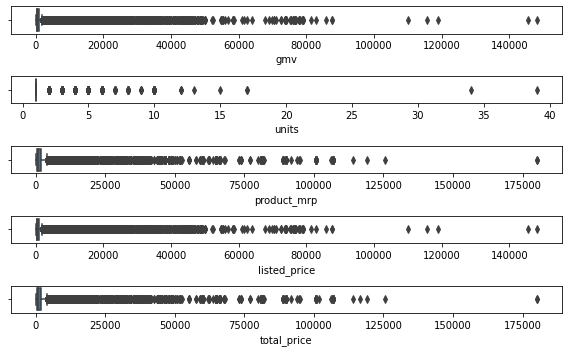

In [141]:
# Features with outliers

outliers = ['gmv', 'units', 'product_mrp', 'listed_price', 'total_price']


# Plotting the outliers

fig, axs = plt.subplots(5, 1, figsize = (8,5))
sns.boxplot(camera_df['gmv'], ax = axs[0])
sns.boxplot(camera_df['units'], ax = axs[1])
sns.boxplot(camera_df['product_mrp'], ax = axs[2])
sns.boxplot(camera_df['listed_price'], ax = axs[3])
sns.boxplot(camera_df['total_price'], ax = axs[4])
plt.tight_layout()

In [142]:
# Outlier treatment

# camera_df[outliers] = camera_df[outliers].apply(lambda x: x.clip(*x.quantile([0.05, 0.99])))

print(camera_df.shape)


for feature in outliers:
  Q1 = camera_df[feature].quantile(0.25)
  Q3 = camera_df[feature].quantile(0.75)
  IQR = Q3 - Q1
  camera_df = camera_df[(camera_df[feature] >= Q1 - 1.5*IQR) & (camera_df[feature] <= Q3 + 1.5*IQR)]
  
camera_df.shape

(219738, 23)


(171026, 23)

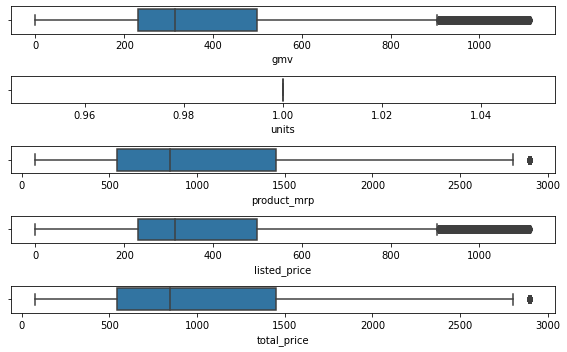

In [143]:
# Plotting the outliers again

fig, axs = plt.subplots(5, 1, figsize = (8,5))
sns.boxplot(camera_df['gmv'], ax = axs[0])
sns.boxplot(camera_df['units'], ax = axs[1])
sns.boxplot(camera_df['product_mrp'], ax = axs[2])
sns.boxplot(camera_df['listed_price'], ax = axs[3])
sns.boxplot(camera_df['total_price'], ax = axs[4])
plt.tight_layout()

In [144]:
camera_df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,payment_type,sla,cust_id,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,listed_price,discount_percent,total_price,COD,week,luxury_product
0,ACCDAGSHU2ZYMHCF,2015-07-03 17:43:56,2015,7,166217848.000,210948784.000,595.000,1,Prepaid,4.000,-2.8220942051791E+018,-9.03104320709149E+018,CameraAccessory,CameraAccessory,CameraTripod,1450.000,4.000,595.000,58.966,1450.000,0,1,0
1,ACCE8FTBX23SZS5D,2015-07-03 12:32:16,2015,7,166086523.000,210794913.000,589.000,1,Prepaid,2.000,1.13075333487717E+018,-4.77932755954421E+018,CameraAccessory,CameraAccessory,CameraTripod,1499.000,4.000,589.000,60.707,1499.000,0,1,0
2,ACCE74G5DYGFFHQM,2015-07-03 15:57:42,2015,7,166174414.000,210898046.000,889.000,1,Prepaid,2.000,8.27004739192253E+018,6.1166679243864E+018,CameraAccessory,CameraAccessory,CameraTripod,1699.000,1.000,889.000,47.675,1699.000,0,1,0
4,ACCDHQ8N6DGBYGKZ,2015-07-03 13:52:54,2015,7,166120581.000,210834762.000,749.000,1,Prepaid,2.000,-1.20337331631949E+018,-6.18830472015878E+018,CameraAccessory,CameraAccessory,CameraTripod,1499.000,2.000,749.000,50.033,1499.000,0,1,0
5,ACCE8FTBXFKBNZMY,2015-07-03 19:36:20,2015,7,166261486.000,210999643.000,299.000,1,Prepaid,2.000,1.89136900995036E+018,4.75731765744678E+018,CameraAccessory,CameraAccessory,CameraTripod,1599.000,1.000,299.000,81.301,1599.000,0,1,0


In [145]:
camera_df.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'listed_price', 'discount_percent', 'total_price', 'COD', 'week',
       'luxury_product'],
      dtype='object')

### Feature Selection

In [146]:
# Filtering the required/important features and re-ordering the columns

imp_features = ['week','order_id', 'order_item_id',
                'sla', 'product_procurement_sla',
                'product_mrp', 'units', 'gmv', 
                'listed_price', 'discount_percent', 'total_price', 'COD', 
                'luxury_product']


camera_df = camera_df[imp_features]
camera_df.head()

,week,order_id,order_item_id,sla,product_procurement_sla,product_mrp,units,gmv,listed_price,discount_percent,total_price,COD,luxury_product
0,1,166217848.000,210948784.000,4.000,4.000,1450.000,1,595.000,595.000,58.966,1450.000,0,0
1,1,166086523.000,210794913.000,2.000,4.000,1499.000,1,589.000,589.000,60.707,1499.000,0,0
2,1,166174414.000,210898046.000,2.000,1.000,1699.000,1,889.000,889.000,47.675,1699.000,0,0
4,1,166120581.000,210834762.000,2.000,2.000,1499.000,1,749.000,749.000,50.033,1499.000,0,0
5,1,166261486.000,210999643.000,2.000,1.000,1599.000,1,299.000,299.000,81.301,1599.000,0,0


In [147]:
camera_df.columns

Index(['week', 'order_id', 'order_item_id', 'sla', 'product_procurement_sla',
       'product_mrp', 'units', 'gmv', 'listed_price', 'discount_percent',
       'total_price', 'COD', 'luxury_product'],
      dtype='object')

In [148]:
camera_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171026 entries, 0 to 219736
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   week                     171026 non-null  int64  
 1   order_id                 171026 non-null  float64
 2   order_item_id            171026 non-null  float64
 3   sla                      171026 non-null  float64
 4   product_procurement_sla  171026 non-null  float64
 5   product_mrp              171026 non-null  float64
 6   units                    171026 non-null  int64  
 7   gmv                      171026 non-null  float64
 8   listed_price             171026 non-null  float64
 9   discount_percent         171026 non-null  float64
 10  total_price              171026 non-null  float64
 11  COD                      171026 non-null  int64  
 12  luxury_product           171026 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 18.3 MB


In [149]:
# Correcting the data types
camera_df[['order_id', 'order_item_id']] = np.abs(camera_df[['order_id', 'order_item_id']]).astype('int64')

In [150]:
camera_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171026 entries, 0 to 219736
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   week                     171026 non-null  int64  
 1   order_id                 171026 non-null  int64  
 2   order_item_id            171026 non-null  int64  
 3   sla                      171026 non-null  float64
 4   product_procurement_sla  171026 non-null  float64
 5   product_mrp              171026 non-null  float64
 6   units                    171026 non-null  int64  
 7   gmv                      171026 non-null  float64
 8   listed_price             171026 non-null  float64
 9   discount_percent         171026 non-null  float64
 10  total_price              171026 non-null  float64
 11  COD                      171026 non-null  int64  
 12  luxury_product           171026 non-null  int64  
dtypes: float64(7), int64(6)
memory usage: 18.3 MB


In [151]:
# Rolling up the data to the weekly level

camera_df = camera_df.groupby('week').agg({'order_id':pd.Series.nunique,
                                'order_item_id':pd.Series.nunique,
                                 'sla':'mean','product_procurement_sla':'mean',
                                 'product_mrp':'mean',
                                 'units':'mean',
                                 'gmv':'mean', 'listed_price':'mean',
                                 'discount_percent':'mean',
                                 'total_price':'mean',
                                 'COD':'sum',
                                 'luxury_product':'sum'})

camera_df.reset_index(inplace=True)
camera_df.head()

,week,order_id,order_item_id,sla,product_procurement_sla,product_mrp,units,gmv,listed_price,discount_percent,total_price,COD,luxury_product
0,1,24,24,3.208,2.542,965.292,1,421.375,421.375,46.355,965.292,0,0
1,2,2098,2130,7.366,2.508,914.269,1,444.974,444.974,45.287,914.269,1459,0
2,3,2243,2268,6.716,2.524,967.026,1,449.302,449.302,45.778,967.026,1557,0
3,4,2226,2256,6.770,2.525,952.331,1,445.664,445.664,44.456,952.331,1591,0
4,5,1483,1507,6.639,2.546,977.362,1,457.440,457.440,44.936,977.362,1101,0


In [152]:
print(calendar_weekly.shape)
camera_df.shape

(52, 36)


(52, 13)

In [153]:
# Merging the camera_df and calender_df togother

camera_df = calendar_weekly.merge(camera_df, how='left', on='week')
camera_df


,week,special_sale,Payday,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),NPS,Stock_Index,Total Investment,TV,Digital,Sponsorship,Content,Online,Affiliates,SEM,Radio,Other,TV_adstock,Digital_adstock,Sponsorship_adstock,Content_adstock,Online_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,order_id,order_item_id,sla,product_procurement_sla,product_mrp,units,gmv,listed_price,discount_percent,total_price,COD,luxury_product
0,1,0.000,0.200,2015.000,7.000,3.000,25.500,13.200,19.360,0.100,1.460,0.000,0.000,0.000,0.000,54.600,1177.000,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,24.000,24.000,3.208,2.542,965.292,1.000,421.375,421.375,46.355,965.292,0.000,0.000
1,2,0.000,0.000,2015.000,7.000,9.000,24.025,14.385,19.263,1.059,2.322,4.155,0.029,4.184,0.041,54.600,1177.000,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000,2098.000,2130.000,7.366,2.508,914.269,1.000,444.974,444.974,45.287,914.269,1459.000,0.000
2,3,0.286,0.143,2015.000,7.000,16.000,27.383,16.314,21.906,0.816,4.722,1.569,0.029,1.598,0.041,54.600,1177.000,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000,2243.000,2268.000,6.716,2.524,967.026,1.000,449.302,449.302,45.778,967.026,1557.000,0.000
3,4,0.000,0.000,2015.000,7.000,23.000,28.240,14.342,20.540,1.632,4.172,1.141,0.029,1.170,0.041,54.600,1177.000,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000,2226.000,2256.000,6.770,2.525,952.331,1.000,445.664,445.664,44.456,952.331,1591.000,0.000
4,5,0.000,0.143,2015.000,7.286,21.143,29.811,16.242,23.092,0.816,5.908,4.341,0.029,4.370,0.041,56.139,1185.286,1.013,0.001,0.256,0.213,0.000,0.026,0.015,0.503,0.000,0.000,0.028,0.572,1.139,0.000,0.192,0.083,1.131,0.000,0.000,1483.000,1507.000,6.639,2.546,977.362,1.000,457.440,457.440,44.936,977.362,1101.000,0.000
5,6,0.000,0.000,2015.000,8.000,6.000,24.908,12.870,18.475,2.448,2.923,0.938,0.058,0.997,0.082,59.987,1206.000,1.013,0.001,0.256,0.213,0.000,0.026,0.015,0.503,0.000,0.000,0.002,0.383,0.319,0.000,0.039,0.022,0.754,0.000,0.000,4.000,4.000,9.250,4.000,737.250,1.000,549.500,549.500,12.948,737.250,1.000,0.000
6,7,0.286,0.143,2015.000,8.000,13.000,25.148,14.156,19.789,2.448,4.237,2.764,0.088,2.852,0.124,59.987,1206.000,1.013,0.001,0.256,0.213,0.000,0.026,0.015,0.503,0.000,0.000,0.002,0.383,0.319,0.000,0.039,0.022,0.754,0.000,0.000,1.000,1.000,6.000,1.000,1990.000,1.000,299.000,299.000,84.975,1990.000,1.000,0.000
7,8,0.143,0.000,2015.000,8.000,20.000,27.097,17.028,22.134,0.816,4.950,4.769,0.029,4.798,0.041,59.987,1206.000,1.013,0.001,0.256,0.213,0.000,0.026,0.015,0.503,0.000,0.000,0.002,0.383,0.319,0.000,0.039,0.022,0.754,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
8,9,0.429,0.000,2015.000,8.000,27.000,20.556,10.926,15.958,4.294,2.252,1.846,0.146,1.992,0.206,59.987,1206.000,1.013,0.001,0.256,0.213,0.000,0.026,0.015,0.503,0.000,0.000,0.002,0.383,0.319,0.000,0.039,0.022,0.754,0.000,0.000,3.000,3.000,9.667,2.000,628.000,1.000,396.667,396.667,40.965,628.000,1.000,0.000
9,10,0.000,0.143,2015.000,8.857,7.429,28.811,15.842,21.540,1.632,5.172,9.026,0.029,9.055,0.041,48.791,1116.000,24.064,0.970,0.339,15.697,0.153,4.095,1.260,1.551,0.000,0.000,0.971,0.467,15.803,0.153,4.108,1.267,1.802,0.000,0.000,2060.000,1744.000,6.936,2.493,906.689,1.000,453.561,453.561,43.245,906.689,1558.000,0.000


## Gaming Accessories

In [154]:
# Filtering the Data for "Gaming Accessory" sub-category

gaming_df = cust_df[cust_df['product_analytic_sub_category'] == 'GamingAccessory']
gaming_df.sort_values(by='week', inplace=True)
gaming_df.reset_index(inplace=True, drop=True)
gaming_df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,payment_type,sla,cust_id,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,listed_price,discount_percent,total_price,COD,week,luxury_product
0,ACCDYH2ZFYHY5H9N,2015-07-03 09:21:52,2015,7,165905953.000,210586947.000,2280.000,1,Prepaid,4.000,-5.08356752247645E+018,6.51333054134398E+018,GamingHardware,GamingAccessory,GamePad,3500.000,2.000,2280.000,34.857,3500.000,0,1,0
1,ACCE4WJGZVZJENPC,2015-07-03 09:25:01,2015,7,166024250.000,210722079.000,799.000,1,Prepaid,8.000,-8.90172151888131E+018,-6.03266161471385E+018,GamingHardware,GamingAccessory,GamingKeyboard,900.000,1.000,799.000,11.222,900.000,0,1,0
2,ACCE3FU5MYQXJGHZ,2015-07-03 13:33:46,2015,7,166112702.000,210825454.000,2389.000,1,Prepaid,2.000,7.04724096456619E+018,4.84696779902213E+018,GamingHardware,GamingAccessory,GamingMousePad,2499.000,1.000,2389.000,4.402,2499.000,0,1,0
3,ACCDR3SGKUGNSCPY,2015-07-03 13:25:20,2015,7,166109187.000,210821374.000,889.000,1,Prepaid,2.000,-2.22448319995929E+018,-1.12842327904852E+018,GamingHardware,GamingAccessory,GamingMouse,1025.000,5.000,889.000,13.268,1025.000,0,1,0
4,ACCDYFXZ6QEUZEFZ,2015-07-04 10:10:18,2015,7,166438638.000,211202915.000,1415.000,1,Prepaid,2.000,2.11322682486486E+017,6.40491320207757E+018,GamingHardware,GamingAccessory,GamePad,1995.000,4.000,1415.000,29.073,1995.000,0,1,0


Before rolling up the data on a weekly basis by mean, lets check for outliers and treat them as it has effect on rolling up the data(As we are taking mean)

In [155]:
# checking for the distribution of the camera df

gaming_df.describe([.25, .5, .75, .9, .95, .98, .99])

,Year,Month,order_id,order_item_id,gmv,units,sla,product_mrp,product_procurement_sla,listed_price,discount_percent,total_price,COD,week,luxury_product
count,187790.000,187790.000,187790.000,187790.000,187790.000,187790.000,187790.000,187790.000,187790.000,187790.000,187790.000,187790.000,187790.000,187790.000,187790.000
mean,2015.582,6.219,2850216947876744.000,9144518645314060.000,826.657,1.034,5.727,1979.396,2.496,806.891,44.767,2020.986,0.757,30.130,0.000
std,0.493,3.710,1281448318260121.000,42834659686259408.000,1182.674,0.275,2.424,5377.084,1.303,1139.344,23.648,5454.078,0.429,13.414,0.000
min,2015.000,1.000,162957597.000,207200079.000,0.000,1.000,2.000,120.000,1.000,0.000,0.000,120.000,0.000,1.000,0.000
25%,2015.000,3.000,1600713651342975.000,1603231903561050.000,284.000,1.000,4.000,599.000,2.000,279.000,27.273,599.000,1.000,19.000,0.000
50%,2016.000,6.000,2612117754500000.000,2616540565419700.000,445.000,1.000,6.000,950.000,2.000,439.000,43.917,950.000,1.000,30.000,0.000
75%,2016.000,10.000,3618787969786150.000,4390779059595000.000,919.000,1.000,7.000,1699.000,3.000,899.000,61.579,1750.000,1.000,41.000,0.000
90%,2016.000,12.000,4531006145030960.000,4548996818228440.000,1870.000,1.000,9.000,3499.000,5.000,1795.000,77.739,3500.000,1.000,48.000,0.000
95%,2016.000,12.000,4586712287022100.000,4609585608460985.000,2799.000,1.000,10.000,4990.000,5.000,2740.000,84.172,4999.000,1.000,50.000,0.000
98%,2016.000,12.000,4616991641943230.000,300037347711537472.000,4095.000,2.000,12.000,6500.000,5.000,4069.000,92.600,7000.000,1.000,52.000,0.000


### Outlier Treatment

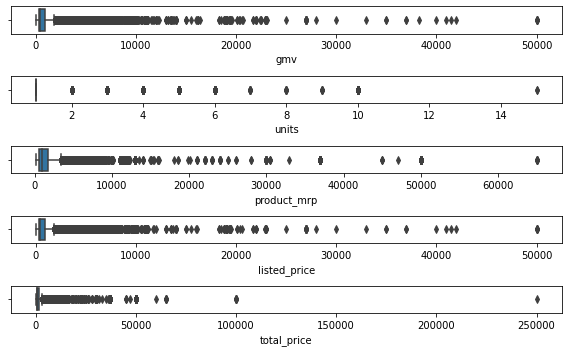

In [156]:
# Features with outliers

outliers = ['gmv', 'units', 'product_mrp', 'listed_price', 'total_price']


# Plotting the outliers

fig, axs = plt.subplots(5, 1, figsize = (8,5))
sns.boxplot(gaming_df['gmv'], ax = axs[0])
sns.boxplot(gaming_df['units'], ax = axs[1])
sns.boxplot(gaming_df['product_mrp'], ax = axs[2])
sns.boxplot(gaming_df['listed_price'], ax = axs[3])
sns.boxplot(gaming_df['total_price'], ax = axs[4])
plt.tight_layout()

In [157]:
# Outlier treatment


print(gaming_df.shape)


for feature in outliers:
  Q1 = gaming_df[feature].quantile(0.25)
  Q3 = gaming_df[feature].quantile(0.75)
  IQR = Q3 - Q1
  gaming_df = gaming_df[(gaming_df[feature] >= Q1 - 1.5*IQR) & (gaming_df[feature] <= Q3 + 1.5*IQR)]
  
gaming_df.shape

(187790, 23)


(136658, 23)

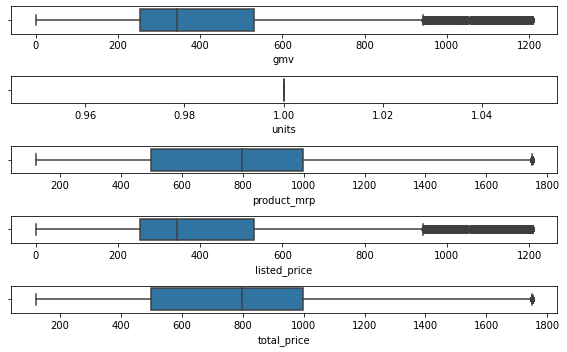

In [158]:
# Plotting the outliers again

fig, axs = plt.subplots(5, 1, figsize = (8,5))
sns.boxplot(gaming_df['gmv'], ax = axs[0])
sns.boxplot(gaming_df['units'], ax = axs[1])
sns.boxplot(gaming_df['product_mrp'], ax = axs[2])
sns.boxplot(gaming_df['listed_price'], ax = axs[3])
sns.boxplot(gaming_df['total_price'], ax = axs[4])
plt.tight_layout()

In [159]:
gaming_df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,payment_type,sla,cust_id,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,listed_price,discount_percent,total_price,COD,week,luxury_product
1,ACCE4WJGZVZJENPC,2015-07-03 09:25:01,2015,7,166024250.000,210722079.000,799.000,1,Prepaid,8.000,-8.90172151888131E+018,-6.03266161471385E+018,GamingHardware,GamingAccessory,GamingKeyboard,900.000,1.000,799.000,11.222,900.000,0,1,0
3,ACCDR3SGKUGNSCPY,2015-07-03 13:25:20,2015,7,166109187.000,210821374.000,889.000,1,Prepaid,2.000,-2.22448319995929E+018,-1.12842327904852E+018,GamingHardware,GamingAccessory,GamingMouse,1025.000,5.000,889.000,13.268,1025.000,0,1,0
5,ACCE88GZUXVFYSXB,2015-07-04 13:25:54,2015,7,166515413.000,211292659.000,740.000,1,Prepaid,9.000,-4.80438314277207E+017,3.19048272542699E+018,GamingHardware,GamingAccessory,GamingHeadset,899.000,5.000,740.000,17.686,899.000,0,1,0
6,ACCE5FQEJWG7TCB4,2015-07-04 13:42:43,2015,7,166522767.000,211301180.000,250.000,1,Prepaid,7.000,7.28874291471314E+018,2.49519640631845E+018,GamingHardware,GamingAccessory,GamingAccessoryKit,599.000,3.000,250.000,58.264,599.000,0,1,0
7,ACCE5FQXQNRRGYNJ,2015-07-01 03:35:02,2015,7,165165918.000,209727476.000,385.000,1,Prepaid,10.000,-6.36522665316929E+018,-5.59395622831527E+018,GamingHardware,GamingAccessory,GamingMouse,699.000,4.000,385.000,44.921,699.000,0,1,0


In [160]:
gaming_df.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'listed_price', 'discount_percent', 'total_price', 'COD', 'week',
       'luxury_product'],
      dtype='object')

### Feature Selection

In [161]:
# Filtering the required/important features and re-ordering the columns

imp_features = ['week','order_id', 'order_item_id',
                'sla', 'product_procurement_sla',
                'product_mrp', 'units', 'gmv', 
                'listed_price', 'discount_percent', 'total_price', 'COD', 
                'luxury_product']


gaming_df = gaming_df[imp_features]
gaming_df.head()

,week,order_id,order_item_id,sla,product_procurement_sla,product_mrp,units,gmv,listed_price,discount_percent,total_price,COD,luxury_product
1,1,166024250.000,210722079.000,8.000,1.000,900.000,1,799.000,799.000,11.222,900.000,0,0
3,1,166109187.000,210821374.000,2.000,5.000,1025.000,1,889.000,889.000,13.268,1025.000,0,0
5,1,166515413.000,211292659.000,9.000,5.000,899.000,1,740.000,740.000,17.686,899.000,0,0
6,1,166522767.000,211301180.000,7.000,3.000,599.000,1,250.000,250.000,58.264,599.000,0,0
7,1,165165918.000,209727476.000,10.000,4.000,699.000,1,385.000,385.000,44.921,699.000,0,0


In [162]:
gaming_df.columns

Index(['week', 'order_id', 'order_item_id', 'sla', 'product_procurement_sla',
       'product_mrp', 'units', 'gmv', 'listed_price', 'discount_percent',
       'total_price', 'COD', 'luxury_product'],
      dtype='object')

In [163]:
gaming_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136658 entries, 1 to 187788
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   week                     136658 non-null  int64  
 1   order_id                 136658 non-null  float64
 2   order_item_id            136658 non-null  float64
 3   sla                      136658 non-null  float64
 4   product_procurement_sla  136658 non-null  float64
 5   product_mrp              136658 non-null  float64
 6   units                    136658 non-null  int64  
 7   gmv                      136658 non-null  float64
 8   listed_price             136658 non-null  float64
 9   discount_percent         136658 non-null  float64
 10  total_price              136658 non-null  float64
 11  COD                      136658 non-null  int64  
 12  luxury_product           136658 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 14.6 MB


In [164]:
# Correcting the data types
gaming_df[['order_id', 'order_item_id']] = np.abs(gaming_df[['order_id', 'order_item_id']]).astype('int64')

In [165]:
gaming_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136658 entries, 1 to 187788
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   week                     136658 non-null  int64  
 1   order_id                 136658 non-null  int64  
 2   order_item_id            136658 non-null  int64  
 3   sla                      136658 non-null  float64
 4   product_procurement_sla  136658 non-null  float64
 5   product_mrp              136658 non-null  float64
 6   units                    136658 non-null  int64  
 7   gmv                      136658 non-null  float64
 8   listed_price             136658 non-null  float64
 9   discount_percent         136658 non-null  float64
 10  total_price              136658 non-null  float64
 11  COD                      136658 non-null  int64  
 12  luxury_product           136658 non-null  int64  
dtypes: float64(7), int64(6)
memory usage: 14.6 MB


In [166]:
# Rolling up the data to the weekly level

gaming_df = gaming_df.groupby('week').agg({'order_id':pd.Series.nunique,
                                'order_item_id':pd.Series.nunique,
                                 'sla':'mean','product_procurement_sla':'mean',
                                 'product_mrp':'mean',
                                 'units':'mean',
                                 'gmv':'mean', 'listed_price':'mean',
                                 'discount_percent':'mean',
                                 'total_price':'mean',
                                 'COD':'sum',
                                 'luxury_product':'sum'})

gaming_df.reset_index(inplace=True)
gaming_df.head()

,week,order_id,order_item_id,sla,product_procurement_sla,product_mrp,units,gmv,listed_price,discount_percent,total_price,COD,luxury_product
0,1,19,19,4.158,2.526,666.421,1,499.368,499.368,22.860,666.421,0,0
1,2,2221,2343,5.293,3.120,894.309,1,467.896,467.896,42.474,894.309,1730,0
2,3,2051,2076,5.221,2.589,668.555,1,380.714,380.714,43.572,668.555,1622,0
3,4,1745,1776,5.252,2.401,800.160,1,489.387,489.387,35.986,800.160,1406,0
4,5,1108,1124,5.682,2.332,783.811,1,483.509,483.509,36.695,783.811,921,0


In [167]:
# Merging the camera_df and calender_df togother

gaming_df = calendar_weekly.merge(gaming_df, how='left', on='week')
gaming_df


,week,special_sale,Payday,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),NPS,Stock_Index,Total Investment,TV,Digital,Sponsorship,Content,Online,Affiliates,SEM,Radio,Other,TV_adstock,Digital_adstock,Sponsorship_adstock,Content_adstock,Online_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,order_id,order_item_id,sla,product_procurement_sla,product_mrp,units,gmv,listed_price,discount_percent,total_price,COD,luxury_product
0,1,0.000,0.200,2015.000,7.000,3.000,25.500,13.200,19.360,0.100,1.460,0.000,0.000,0.000,0.000,54.600,1177.000,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,19,19,4.158,2.526,666.421,1,499.368,499.368,22.860,666.421,0,0
1,2,0.000,0.000,2015.000,7.000,9.000,24.025,14.385,19.263,1.059,2.322,4.155,0.029,4.184,0.041,54.600,1177.000,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000,2221,2343,5.293,3.120,894.309,1,467.896,467.896,42.474,894.309,1730,0
2,3,0.286,0.143,2015.000,7.000,16.000,27.383,16.314,21.906,0.816,4.722,1.569,0.029,1.598,0.041,54.600,1177.000,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000,2051,2076,5.221,2.589,668.555,1,380.714,380.714,43.572,668.555,1622,0
3,4,0.000,0.000,2015.000,7.000,23.000,28.240,14.342,20.540,1.632,4.172,1.141,0.029,1.170,0.041,54.600,1177.000,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000,1745,1776,5.252,2.401,800.160,1,489.387,489.387,35.986,800.160,1406,0
4,5,0.000,0.143,2015.000,7.286,21.143,29.811,16.242,23.092,0.816,5.908,4.341,0.029,4.370,0.041,56.139,1185.286,1.013,0.001,0.256,0.213,0.000,0.026,0.015,0.503,0.000,0.000,0.028,0.572,1.139,0.000,0.192,0.083,1.131,0.000,0.000,1108,1124,5.682,2.332,783.811,1,483.509,483.509,36.695,783.811,921,0
5,6,0.000,0.000,2015.000,8.000,6.000,24.908,12.870,18.475,2.448,2.923,0.938,0.058,0.997,0.082,59.987,1206.000,1.013,0.001,0.256,0.213,0.000,0.026,0.015,0.503,0.000,0.000,0.002,0.383,0.319,0.000,0.039,0.022,0.754,0.000,0.000,4,4,6.000,2.250,781.000,1,447.500,447.500,47.773,781.000,3,0
6,7,0.286,0.143,2015.000,8.000,13.000,25.148,14.156,19.789,2.448,4.237,2.764,0.088,2.852,0.124,59.987,1206.000,1.013,0.001,0.256,0.213,0.000,0.026,0.015,0.503,0.000,0.000,0.002,0.383,0.319,0.000,0.039,0.022,0.754,0.000,0.000,1,1,4.000,1.000,349.000,1,289.000,289.000,17.192,349.000,1,0
7,8,0.143,0.000,2015.000,8.000,20.000,27.097,17.028,22.134,0.816,4.950,4.769,0.029,4.798,0.041,59.987,1206.000,1.013,0.001,0.256,0.213,0.000,0.026,0.015,0.503,0.000,0.000,0.002,0.383,0.319,0.000,0.039,0.022,0.754,0.000,0.000,3,3,3.000,2.000,549.000,1,295.667,295.667,45.460,549.000,3,0
8,9,0.429,0.000,2015.000,8.000,27.000,20.556,10.926,15.958,4.294,2.252,1.846,0.146,1.992,0.206,59.987,1206.000,1.013,0.001,0.256,0.213,0.000,0.026,0.015,0.503,0.000,0.000,0.002,0.383,0.319,0.000,0.039,0.022,0.754,0.000,0.000,3,3,6.333,3.000,716.000,1,289.333,289.333,50.664,716.000,3,0
9,10,0.000,0.143,2015.000,8.857,7.429,28.811,15.842,21.540,1.632,5.172,9.026,0.029,9.055,0.041,48.791,1116.000,24.064,0.970,0.339,15.697,0.153,4.095,1.260,1.551,0.000,0.000,0.971,0.467,15.803,0.153,4.108,1.267,1.802,0.000,0.000,2027,1793,5.150,2.598,647.376,1,389.880,389.880,38.953,647.376,1698,0


## Home Audio Accessories

In [168]:
cust_df['product_analytic_sub_category'].value_counts()

CameraAccessory    219738
GamingAccessory    187790
HomeAudio          114903
Name: product_analytic_sub_category, dtype: int64

In [169]:
# Filtering the Data for "Gaming Accessory" sub-category

home_df = cust_df[cust_df['product_analytic_sub_category'] == 'HomeAudio']
home_df.sort_values(by='week', inplace=True)
home_df.reset_index(inplace=True, drop=True)
home_df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,payment_type,sla,cust_id,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,listed_price,discount_percent,total_price,COD,week,luxury_product
0,ACCEFUJRZ5ZCJKYT,2015-07-01 09:02:59,2015,7,165187825.000,209752531.000,2249.000,1,Prepaid,7.000,-8.65906252854915E+018,4.79427064452622E+017,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,2800.000,4.000,2249.000,19.679,2800.000,0,1,0
1,ACCDVZ83VBHCWFFA,2015-07-03 18:06:06,2015,7,166226395.000,210958768.000,2189.000,1,Prepaid,2.000,-7.40779242381631E+018,6.49796942764283E+018,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,6990.000,4.000,2189.000,68.684,6990.000,0,1,0
2,BBXE29UFECCU6GWG,2015-07-01 11:43:08,2015,7,165227580.000,209798750.000,2950.000,1,Prepaid,6.000,2.83909688166493E+018,-5.1750058942027E+018,EntertainmentSmall,HomeAudio,BoomBox,3299.000,5.000,2950.000,10.579,3299.000,0,1,0
3,ACCDRKG3H7PJRG4T,2015-07-03 01:33:35,2015,7,165986063.000,210678327.000,2990.000,1,Prepaid,2.000,7.64711674406358E+018,7.68693767541594E+018,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,3650.000,5.000,2990.000,18.082,3650.000,0,1,0
4,ACCDRKG3H7PJRG4T,2015-07-03 20:07:55,2015,7,166274446.000,211014765.000,2900.000,1,Prepaid,2.000,7.03862862390913E+018,2.29138238772398E+018,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,3650.000,5.000,2900.000,20.548,3650.000,0,1,0


Before rolling up the data on a weekly basis by mean, lets check for outliers and treat them as it has effect on rolling up the data(As we are taking mean)

In [170]:
# checking for the distribution of the camera df

home_df.describe([.25, .5, .75, .9, .95, .98, .99])

,Year,Month,order_id,order_item_id,gmv,units,sla,product_mrp,product_procurement_sla,listed_price,discount_percent,total_price,COD,week,luxury_product
count,114903.000,114903.000,114903.000,114903.000,114903.000,114903.000,114903.000,114903.000,114903.000,114903.000,114903.000,114903.000,114903.000,114903.000,114903.000
mean,2015.498,6.595,2772408943976061.500,9866476635534056.000,2141.389,1.010,5.748,3785.890,2.616,2126.950,37.270,3812.978,0.753,27.331,0.000
std,0.500,3.817,1328178450771113.500,45423097778703296.000,1884.869,0.165,2.765,3443.628,1.402,1865.109,21.720,3486.014,0.431,13.206,0.000
min,2015.000,1.000,164330767.000,208766489.000,0.000,1.000,2.000,189.000,1.000,0.000,0.000,189.000,0.000,1.000,0.000
25%,2015.000,3.000,1558501804920400.000,1560618890478250.000,1068.000,1.000,4.000,1499.000,1.000,1049.000,18.546,1499.000,1.000,16.000,0.000
50%,2015.000,7.000,2583532569898000.000,2590626016116000.000,1950.000,1.000,6.000,3300.000,2.000,1950.000,41.596,3400.000,1.000,27.000,0.000
75%,2016.000,10.000,3600163410775650.000,3636002143010250.000,2599.000,1.000,7.000,5399.000,4.000,2599.000,56.274,5399.000,1.000,37.000,0.000
90%,2016.000,12.000,4509205413139520.000,4530790358961380.000,3450.000,1.000,10.000,6990.000,5.000,3400.000,63.391,6990.000,1.000,46.000,0.000
95%,2016.000,12.000,4561730341307510.000,4597519727153010.000,4569.400,1.000,11.000,6990.000,5.000,4544.000,66.395,6999.000,1.000,49.000,0.000
98%,2016.000,12.000,4607097178533568.000,300037347712156992.000,6071.920,1.000,12.000,9990.000,5.000,5999.000,71.114,10200.000,1.000,51.000,0.000


### Outlier Treatment

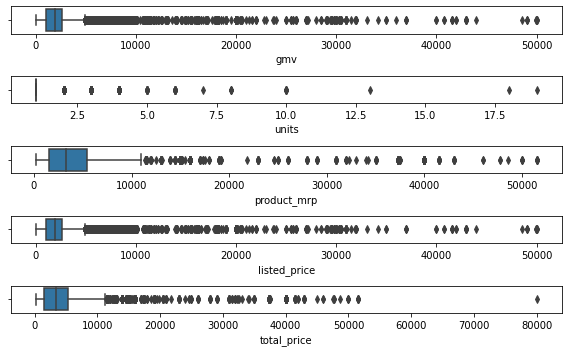

In [171]:
# Features with outliers

outliers = ['gmv', 'units', 'product_mrp', 'listed_price', 'total_price']


# Plotting the outliers

fig, axs = plt.subplots(5, 1, figsize = (8,5))
sns.boxplot(home_df['gmv'], ax = axs[0])
sns.boxplot(home_df['units'], ax = axs[1])
sns.boxplot(home_df['product_mrp'], ax = axs[2])
sns.boxplot(home_df['listed_price'], ax = axs[3])
sns.boxplot(home_df['total_price'], ax = axs[4])
plt.tight_layout()

In [172]:
# Outlier treatment


print(home_df.shape)


for feature in outliers:
  Q1 = home_df[feature].quantile(0.25)
  Q3 = home_df[feature].quantile(0.75)
  IQR = Q3 - Q1
  home_df = home_df[(home_df[feature] >= Q1 - 1.5*IQR) & (home_df[feature] <= Q3 + 1.5*IQR)]
  
home_df.shape

(114903, 23)


(108860, 23)

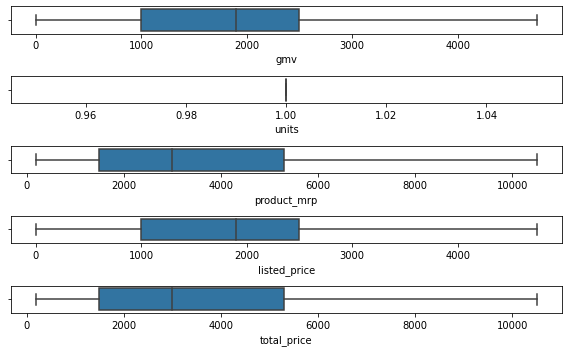

In [173]:
# Plotting the outliers again

fig, axs = plt.subplots(5, 1, figsize = (8,5))
sns.boxplot(home_df['gmv'], ax = axs[0])
sns.boxplot(home_df['units'], ax = axs[1])
sns.boxplot(home_df['product_mrp'], ax = axs[2])
sns.boxplot(home_df['listed_price'], ax = axs[3])
sns.boxplot(home_df['total_price'], ax = axs[4])
plt.tight_layout()

In [174]:
home_df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,payment_type,sla,cust_id,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,listed_price,discount_percent,total_price,COD,week,luxury_product
0,ACCEFUJRZ5ZCJKYT,2015-07-01 09:02:59,2015,7,165187825.000,209752531.000,2249.000,1,Prepaid,7.000,-8.65906252854915E+018,4.79427064452622E+017,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,2800.000,4.000,2249.000,19.679,2800.000,0,1,0
1,ACCDVZ83VBHCWFFA,2015-07-03 18:06:06,2015,7,166226395.000,210958768.000,2189.000,1,Prepaid,2.000,-7.40779242381631E+018,6.49796942764283E+018,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,6990.000,4.000,2189.000,68.684,6990.000,0,1,0
2,BBXE29UFECCU6GWG,2015-07-01 11:43:08,2015,7,165227580.000,209798750.000,2950.000,1,Prepaid,6.000,2.83909688166493E+018,-5.1750058942027E+018,EntertainmentSmall,HomeAudio,BoomBox,3299.000,5.000,2950.000,10.579,3299.000,0,1,0
3,ACCDRKG3H7PJRG4T,2015-07-03 01:33:35,2015,7,165986063.000,210678327.000,2990.000,1,Prepaid,2.000,7.64711674406358E+018,7.68693767541594E+018,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,3650.000,5.000,2990.000,18.082,3650.000,0,1,0
4,ACCDRKG3H7PJRG4T,2015-07-03 20:07:55,2015,7,166274446.000,211014765.000,2900.000,1,Prepaid,2.000,7.03862862390913E+018,2.29138238772398E+018,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,3650.000,5.000,2900.000,20.548,3650.000,0,1,0


In [175]:
home_df.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'listed_price', 'discount_percent', 'total_price', 'COD', 'week',
       'luxury_product'],
      dtype='object')

### Feature Selection

In [176]:
# Filtering the required/important features and re-ordering the columns

imp_features = ['week','order_id', 'order_item_id',
                'sla', 'product_procurement_sla',
                'product_mrp', 'units', 'gmv', 
                'listed_price', 'discount_percent', 'total_price', 'COD', 
                'luxury_product']


home_df = home_df[imp_features]
home_df.head()

,week,order_id,order_item_id,sla,product_procurement_sla,product_mrp,units,gmv,listed_price,discount_percent,total_price,COD,luxury_product
0,1,165187825.000,209752531.000,7.000,4.000,2800.000,1,2249.000,2249.000,19.679,2800.000,0,0
1,1,166226395.000,210958768.000,2.000,4.000,6990.000,1,2189.000,2189.000,68.684,6990.000,0,0
2,1,165227580.000,209798750.000,6.000,5.000,3299.000,1,2950.000,2950.000,10.579,3299.000,0,0
3,1,165986063.000,210678327.000,2.000,5.000,3650.000,1,2990.000,2990.000,18.082,3650.000,0,0
4,1,166274446.000,211014765.000,2.000,5.000,3650.000,1,2900.000,2900.000,20.548,3650.000,0,0


In [177]:
home_df.columns

Index(['week', 'order_id', 'order_item_id', 'sla', 'product_procurement_sla',
       'product_mrp', 'units', 'gmv', 'listed_price', 'discount_percent',
       'total_price', 'COD', 'luxury_product'],
      dtype='object')

In [178]:
home_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108860 entries, 0 to 114902
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   week                     108860 non-null  int64  
 1   order_id                 108860 non-null  float64
 2   order_item_id            108860 non-null  float64
 3   sla                      108860 non-null  float64
 4   product_procurement_sla  108860 non-null  float64
 5   product_mrp              108860 non-null  float64
 6   units                    108860 non-null  int64  
 7   gmv                      108860 non-null  float64
 8   listed_price             108860 non-null  float64
 9   discount_percent         108860 non-null  float64
 10  total_price              108860 non-null  float64
 11  COD                      108860 non-null  int64  
 12  luxury_product           108860 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 11.6 MB


In [179]:
# Correcting the data types
home_df[['order_id', 'order_item_id']] = np.abs(home_df[['order_id', 'order_item_id']]).astype('int64')

In [180]:
home_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108860 entries, 0 to 114902
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   week                     108860 non-null  int64  
 1   order_id                 108860 non-null  int64  
 2   order_item_id            108860 non-null  int64  
 3   sla                      108860 non-null  float64
 4   product_procurement_sla  108860 non-null  float64
 5   product_mrp              108860 non-null  float64
 6   units                    108860 non-null  int64  
 7   gmv                      108860 non-null  float64
 8   listed_price             108860 non-null  float64
 9   discount_percent         108860 non-null  float64
 10  total_price              108860 non-null  float64
 11  COD                      108860 non-null  int64  
 12  luxury_product           108860 non-null  int64  
dtypes: float64(7), int64(6)
memory usage: 11.6 MB


In [181]:
# Rolling up the data to the weekly level

home_df = home_df.groupby('week').agg({'order_id':pd.Series.nunique,
                                'order_item_id':pd.Series.nunique,
                                 'sla':'mean','product_procurement_sla':'mean',
                                 'product_mrp':'mean',
                                 'units':'mean',
                                 'gmv':'mean', 'listed_price':'mean',
                                 'discount_percent':'mean',
                                 'total_price':'mean',
                                 'COD':'sum',
                                 'luxury_product':'sum'})

home_df.reset_index(inplace=True)
home_df.head()

,week,order_id,order_item_id,sla,product_procurement_sla,product_mrp,units,gmv,listed_price,discount_percent,total_price,COD,luxury_product
0,1,34,34,3.647,3.559,4196.088,1,2322.000,2322.000,39.147,4196.088,1,0
1,2,1989,1990,7.526,2.747,2962.256,1,1833.413,1833.413,32.728,2962.256,1530,0
2,3,2305,2310,7.177,2.673,3097.591,1,1837.564,1837.564,33.984,3097.591,1797,0
3,4,2132,2139,7.219,2.769,2987.637,1,1781.541,1781.541,32.843,2987.637,1703,0
4,5,1497,1499,7.352,2.682,3077.814,1,1842.328,1842.328,32.832,3077.814,1176,0


In [182]:
# Merging the camera_df and calender_df togother

home_df = calendar_weekly.merge(home_df, how='left', on='week')
home_df


,week,special_sale,Payday,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),NPS,Stock_Index,Total Investment,TV,Digital,Sponsorship,Content,Online,Affiliates,SEM,Radio,Other,TV_adstock,Digital_adstock,Sponsorship_adstock,Content_adstock,Online_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,order_id,order_item_id,sla,product_procurement_sla,product_mrp,units,gmv,listed_price,discount_percent,total_price,COD,luxury_product
0,1,0.000,0.200,2015.000,7.000,3.000,25.500,13.200,19.360,0.100,1.460,0.000,0.000,0.000,0.000,54.600,1177.000,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,34.000,34.000,3.647,3.559,4196.088,1.000,2322.000,2322.000,39.147,4196.088,1.000,0.000
1,2,0.000,0.000,2015.000,7.000,9.000,24.025,14.385,19.263,1.059,2.322,4.155,0.029,4.184,0.041,54.600,1177.000,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000,1989.000,1990.000,7.526,2.747,2962.256,1.000,1833.413,1833.413,32.728,2962.256,1530.000,0.000
2,3,0.286,0.143,2015.000,7.000,16.000,27.383,16.314,21.906,0.816,4.722,1.569,0.029,1.598,0.041,54.600,1177.000,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000,2305.000,2310.000,7.177,2.673,3097.591,1.000,1837.564,1837.564,33.984,3097.591,1797.000,0.000
3,4,0.000,0.000,2015.000,7.000,23.000,28.240,14.342,20.540,1.632,4.172,1.141,0.029,1.170,0.041,54.600,1177.000,4.265,0.054,0.633,1.854,0.000,0.332,0.137,1.256,0.000,0.000,0.081,0.950,2.780,0.000,0.498,0.205,1.884,0.000,0.000,2132.000,2139.000,7.219,2.769,2987.637,1.000,1781.541,1781.541,32.843,2987.637,1703.000,0.000
4,5,0.000,0.143,2015.000,7.286,21.143,29.811,16.242,23.092,0.816,5.908,4.341,0.029,4.370,0.041,56.139,1185.286,1.013,0.001,0.256,0.213,0.000,0.026,0.015,0.503,0.000,0.000,0.028,0.572,1.139,0.000,0.192,0.083,1.131,0.000,0.000,1497.000,1499.000,7.352,2.682,3077.814,1.000,1842.328,1842.328,32.832,3077.814,1176.000,0.000
5,6,0.000,0.000,2015.000,8.000,6.000,24.908,12.870,18.475,2.448,2.923,0.938,0.058,0.997,0.082,59.987,1206.000,1.013,0.001,0.256,0.213,0.000,0.026,0.015,0.503,0.000,0.000,0.002,0.383,0.319,0.000,0.039,0.022,0.754,0.000,0.000,1.000,1.000,9.000,2.000,3099.000,1.000,2599.000,2599.000,16.134,3099.000,0.000,0.000
6,7,0.286,0.143,2015.000,8.000,13.000,25.148,14.156,19.789,2.448,4.237,2.764,0.088,2.852,0.124,59.987,1206.000,1.013,0.001,0.256,0.213,0.000,0.026,0.015,0.503,0.000,0.000,0.002,0.383,0.319,0.000,0.039,0.022,0.754,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,8,0.143,0.000,2015.000,8.000,20.000,27.097,17.028,22.134,0.816,4.950,4.769,0.029,4.798,0.041,59.987,1206.000,1.013,0.001,0.256,0.213,0.000,0.026,0.015,0.503,0.000,0.000,0.002,0.383,0.319,0.000,0.039,0.022,0.754,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
8,9,0.429,0.000,2015.000,8.000,27.000,20.556,10.926,15.958,4.294,2.252,1.846,0.146,1.992,0.206,59.987,1206.000,1.013,0.001,0.256,0.213,0.000,0.026,0.015,0.503,0.000,0.000,0.002,0.383,0.319,0.000,0.039,0.022,0.754,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9,10,0.000,0.143,2015.000,8.857,7.429,28.811,15.842,21.540,1.632,5.172,9.026,0.029,9.055,0.041,48.791,1116.000,24.064,0.970,0.339,15.697,0.153,4.095,1.260,1.551,0.000,0.000,0.971,0.467,15.803,0.153,4.108,1.267,1.802,0.000,0.000,1751.000,1585.000,5.727,2.740,3120.106,1.000,1745.453,1745.453,36.713,3120.106,1361.000,0.000


# Exporting the sub-categories data to CSV file

In [183]:
# Exporting the camera accessories DataFrame to csv
camera_df.to_csv(r'/content/gdrive/MyDrive/E Commerce Capstone Project/Project FIles/camera_accessories.csv')

# Exporting the gaming accessories DataFrame to csv
gaming_df.to_csv(r'/content/gdrive/MyDrive/E Commerce Capstone Project/Project FIles/gaming_accessories.csv')

# Exporting the homing accessories DataFrame to csv
home_df.to_csv(r'/content/gdrive/MyDrive/E Commerce Capstone Project/Project FIles/home_accessories.csv')